In [1]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pathlib
from matplotlib.lines import Line2D
from PIL import Image
import seaborn as sns

%matplotlib inline


In [2]:
_METRICS_FILE = './files/benchmark'
_METRIC = 'kappa'

## Read file with metrics

In [3]:
try:
    #read csv file
    metrics = pd.read_csv(_METRICS_FILE+'.csv')
except OSError as err:
    # if there is no csv file we read the excel file
    excel_file = pd.read_excel(_METRICS_FILE+'.xlsx')
    # transform the excel file in a csv file
    excel_file.to_csv(_METRICS_FILE+'.csv', index=False)
    # read the new csv file 
    metrics = pd.read_csv(_METRICS_FILE+'.csv')
except:
    print("ERROR WHILE READING METRICS FILE")


In [4]:
metrics = metrics[metrics.instances>772]

In [5]:
metrics.sample(5)

dataset             classifier  instances  attributes  \
2133  UWaveGestureLibraryZ         MOA_Perceptron       4478         315   
2128  UWaveGestureLibraryZ             MOA_OzaBag       4478         315   
564        ElectricDevices        MOA_OzaBagAdwin      16637          96   
248           CinCECGtorso         MOA_Perceptron       1420        1639   
1826            Strawberry  sklearn_SGDClassifier        973         235   

      classes  accuracy     kappa  train_time_mean  test_time_mean  \
2133        8  0.000000  0.000000         0.000002        0.000009   
2128        8  0.586830  0.505484         0.012184        0.014243   
564         7  0.576634  0.471496         0.006048        0.003293   
248         4  0.000000  0.000000         0.000005        0.000011   
1826        2  0.621009  0.168270         0.000190        0.000086   

      total_time_mean  train_time  test_time  total_time  
2133         0.000011    0.001106   0.004001    0.005107  
2128         0.026427    5.458234   6.380936   11.839170  
564          0.009342   10.064514   5.479751   15.544264  
248          0.000016    0.000647   0.001594    0.002241  
1826         0.000276    0.018661   0.008418    0.027080

## Useful variables

In [6]:
family_label = {'NN'  : 'Neural_Network',
                'LM'  : 'Linear_Model',
                'NB'  : 'Naive_Bayes',
                'DC'  : 'Dummy_Classifier',
                'DT'  : 'Decision_Trees',
                'MC'  : 'Meta_Classifier',
               }
classifier_family = {'keras_parallel_3_Dilated_Conv':'NN',
                   'keras_3_Dilated_Conv':'NN',
                   'sklearn_MLPClassifier':'NN',
                   'sklearn_Perceptron':'LM',
                   'sklearn_SGDClassifier':'LM',
                   'sklearn_BernoulliNB':'NB',
                   'sklearn_PassiveAggressiveClassifier':'LM',
                   'MOA_MajorityClass':'DC',
                   'MOA_RandomHoeffdingTree':'DT',
                   'MOA_NaiveBayes':'NB',
                   'MOA_SPegasos':'LM',
                   'MOA_OzaBagAdwin':'MC',
                   'MOA_OzaBoost':'MC',
                   'MOA_OzaBag':'MC',
                   'MOA_OCBoost':'MC',
                   'MOA_SingleClassifierDrift':'MC',
                   'MOA_WeightedMajorityAlgorithm':'MC',
                   'MOA_OzaBoostAdwin':'MC',
                   'MOA_Perceptron':'LM',
                   'MOA_HoeffdingAdaptiveTree':'NB',
                   'MOA_HoeffdingOptionTree':'NB',
                   'MOA_LeveragingBag':'MC',
                   'MOA_DecisionStump':'DT',
                   'MOA_OzaBagASHT':'MC',
                   'MOA_SGD':'LM',
                   'MOA_AdaHoeffdingOptionTree':'DT',
                   'MOA_ASHoeffdingTree':'DT',
                   'MOA_ActiveClassifier':'DC',
                   'MOA_HoeffdingTree':'DT'
                  }
#classifier_family = {'keras_3_Dilated_Conv':'NN',
#                   'keras_parallel_3_Dilated_Conv':'NN'
#                  }

family_classifier = {l:[k for k,v in classifier_family.items() if v == l] for l in family_label.keys()}
family_color = {'NN'  : 'k',
                'LM'  : 'b',
                'NB'  : 'g',
                'DC'  : 'y',
                'DT'  : 'r',
                'MC'  : 'm',
               }
line_style = ['-','--', '-.', ':', '>-','o--', 'x-.', '^:', 'o-','x--', '^-.', '>:', 'x-','^--', '>-.', 'o:', '^-','>--', 'o-.', 'x:']
classifier_to_compare = ['keras_parallel_3_Dilated_Conv', 'keras_3_Dilated_Conv']


In [7]:
metrics.head()['dataset']

0    Adiac
1    Adiac
2    Adiac
3    Adiac
4    Adiac
Name: dataset, dtype: object

In [8]:
datasets = metrics.dataset.unique()
classifiers = metrics['classifier'].unique()

In [9]:
directory = './files/'+_METRIC+'/'
pathlib.Path(directory).mkdir(parents=True, exist_ok=True)

## Estudio de los valores de _METRIC sin preprocesarlos

In [10]:
metrics_table = metrics.pivot(index='dataset',columns='classifier')[_METRIC]
metrics_table = metrics_table.dropna()
metrics_table = metrics_table[list(classifier_family.keys())]
print(metrics_table.shape)

# Add mean row and save to file
metrics_table.loc['mean'] = metrics_table.mean()
metrics_table.to_csv(directory+'table_'+_METRIC+'.csv')
metrics_table = metrics_table.drop(index='mean')

metrics_table.sample(10)


(49, 29)


classifier             keras_parallel_3_Dilated_Conv  keras_3_Dilated_Conv  \
dataset                                                                      
carnorm                                     0.081833              0.082432   
InsectWingbeatSound                         0.583248              0.608214   
ChlorineConcentration                       0.283538              0.938386   
Strawberry                                  0.737588              0.871826   
SonyAIBORobotSurface2                       0.915627              0.934558   
MoteStrain                                  0.888878              0.902454   
Wafer                                       0.996619              0.873706   
covtype                                     0.927106              0.000003   
ECGFiveDays                                 0.972348              0.985859   
higgs200k                                   0.145869              0.000004   

classifier             sklearn_MLPClassifier  sklearn_Perceptron  \
dataset                                                            
carnorm                             0.135220            0.324657   
InsectWingbeatSound                 0.576449            0.454361   
ChlorineConcentration               0.081596            0.090978   
Strawberry                          0.241571            0.154708   
SonyAIBORobotSurface2               0.782750            0.746632   
MoteStrain                          0.781020            0.724254   
Wafer                               0.990666            0.463794   
covtype                             0.914051            0.893317   
ECGFiveDays                         0.907772            0.762179   
higgs200k                           0.274031            0.033547   

classifier             sklearn_SGDClassifier  sklearn_BernoulliNB  \
dataset                                                             
carnorm                             0.374492             0.477393   
InsectWingbeatSound                 0.464547             0.551523   
ChlorineConcentration               0.099131             0.116355   
Strawberry                          0.168270             0.572944   
SonyAIBORobotSurface2               0.725094             0.640102   
MoteStrain                          0.698180             0.629105   
Wafer                               0.542139             0.154420   
covtype                             0.923754             0.757464   
ECGFiveDays                         0.809031             0.597647   
higgs200k                           0.088395             0.015861   

classifier             sklearn_PassiveAggressiveClassifier  MOA_MajorityClass  \
dataset                                                                         
carnorm                                           0.387553           0.082432   
InsectWingbeatSound                               0.437856           0.000000   
ChlorineConcentration                             0.102326           0.000699   
Strawberry                                        0.126118           0.000000   
SonyAIBORobotSurface2                             0.716098           0.000000   
MoteStrain                                        0.719677           0.000000   
Wafer                                             0.474492           0.278495   
covtype                                           0.914403           0.000003   
ECGFiveDays                                       0.866873           0.000000   
higgs200k                                         0.074177           0.000004   

classifier             MOA_RandomHoeffdingTree  MOA_NaiveBayes  \
dataset                                                          
carnorm                               0.185629        0.512378   
InsectWingbeatSound                   0.511492        0.587229   
ChlorineConcentration                 0.000704        0.122219   
Strawberry                            0.648679        0.601104   
SonyAIBORobotSurface2                 0.576266  

In [11]:
color = [family_color[classifier_family[classifier]] for classifier in classifier_family.keys()]
line = [line_style[family_classifier[classifier_family[classifier]].index(classifier)] for classifier in classifier_family.keys()]
style = [c+s for c,s in list(zip(color,line))]

### Plot _METRIC for each dataset

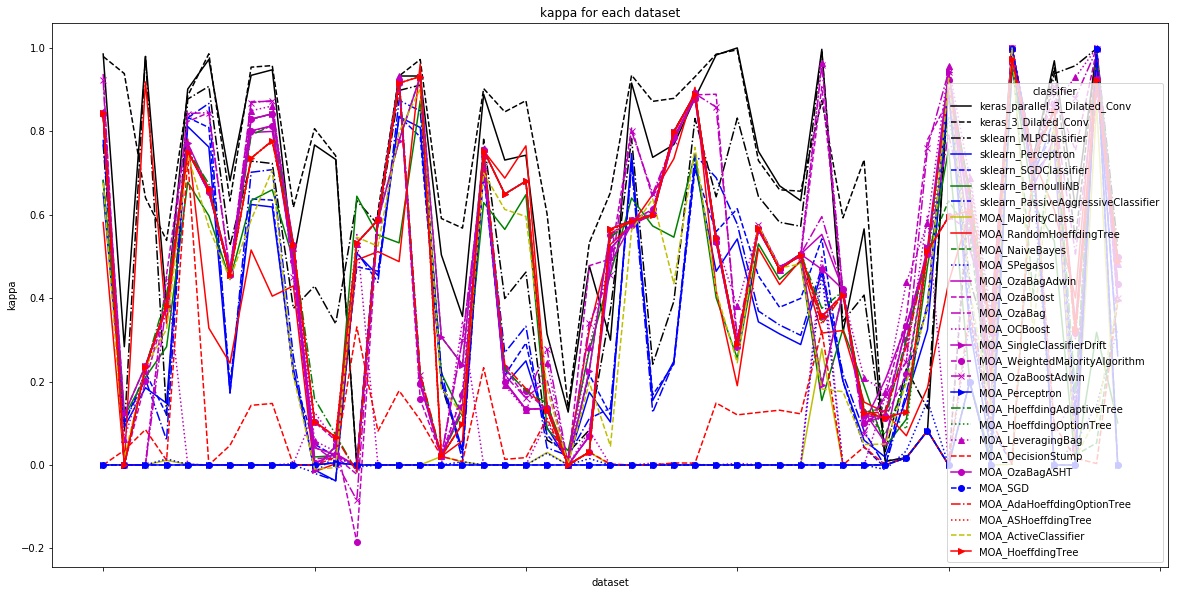

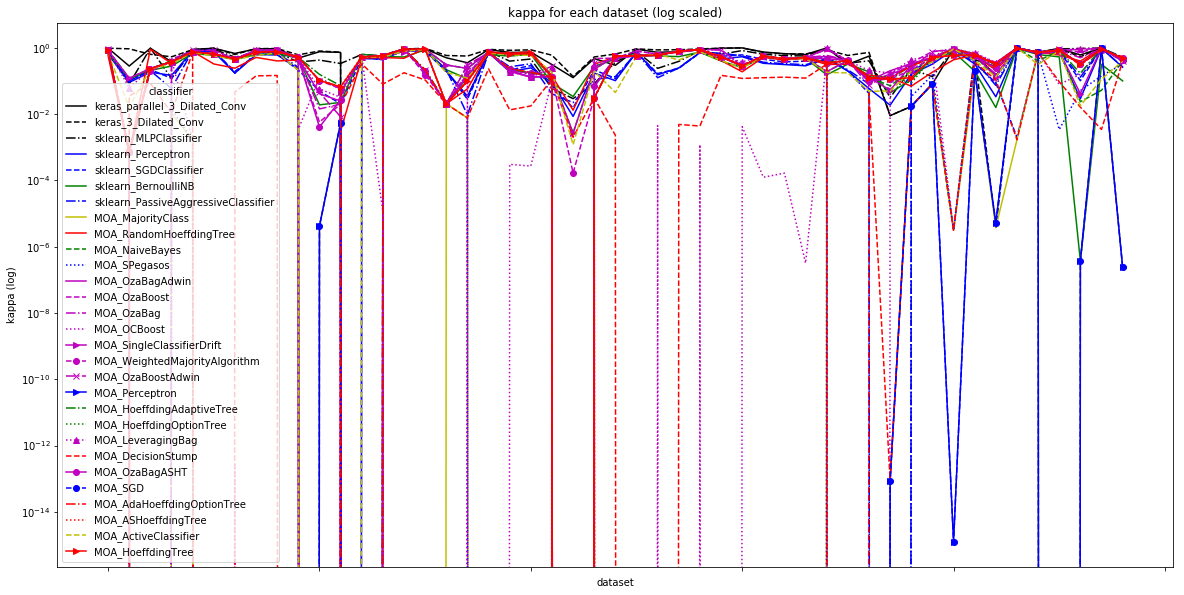

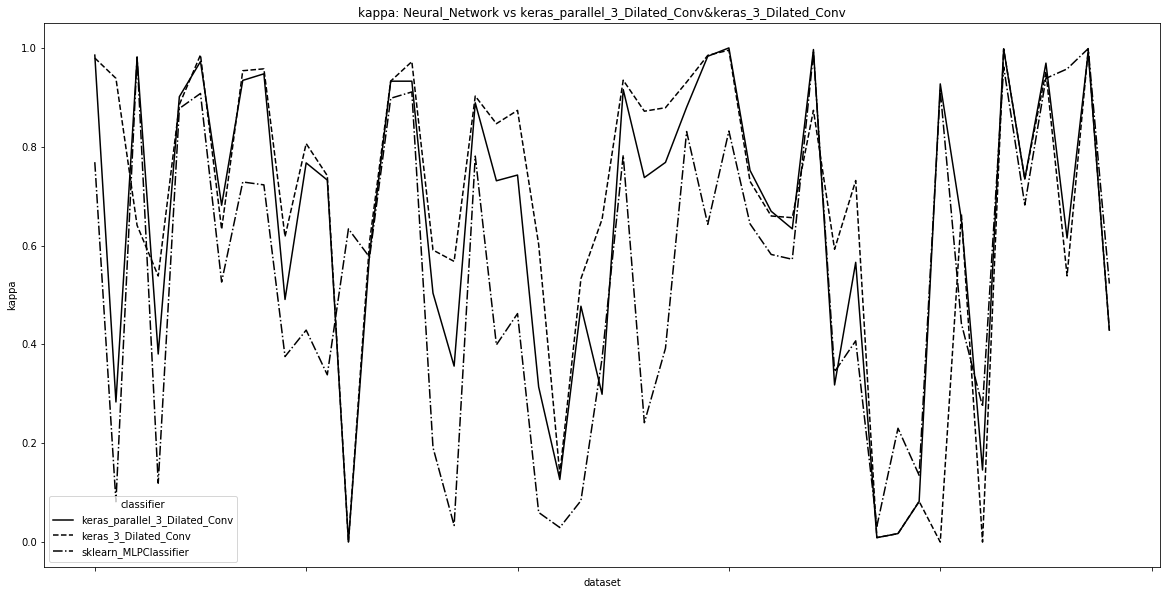

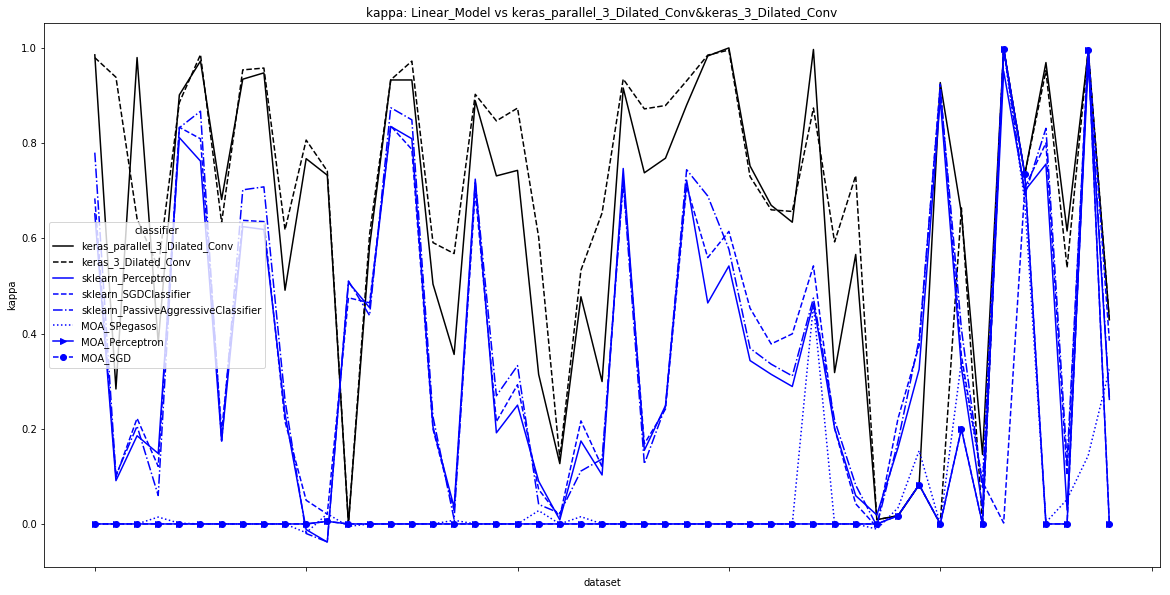

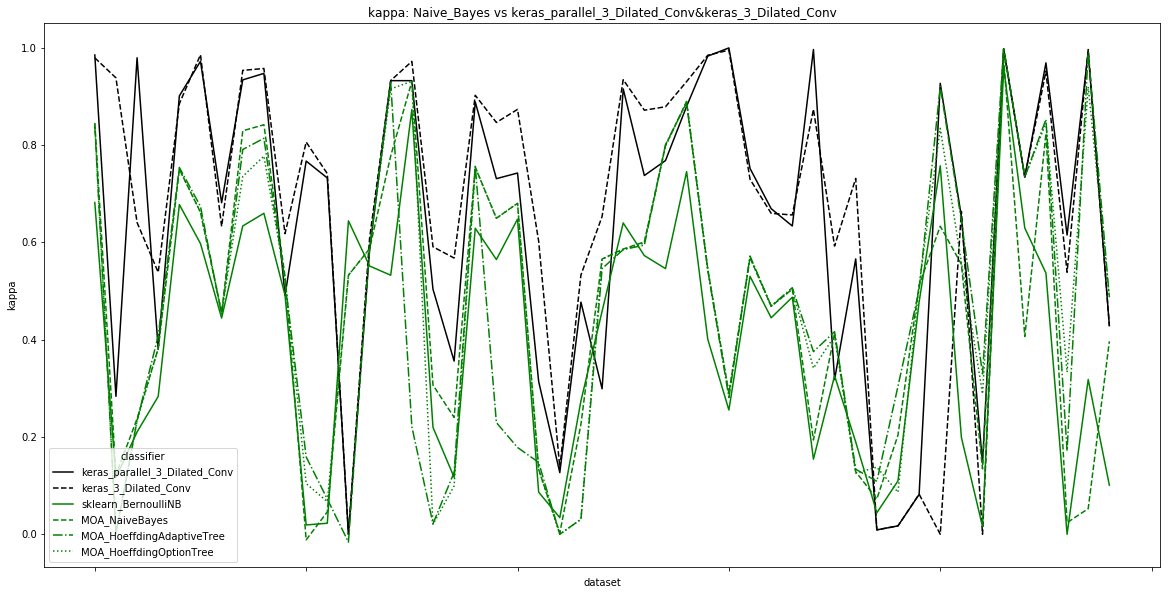

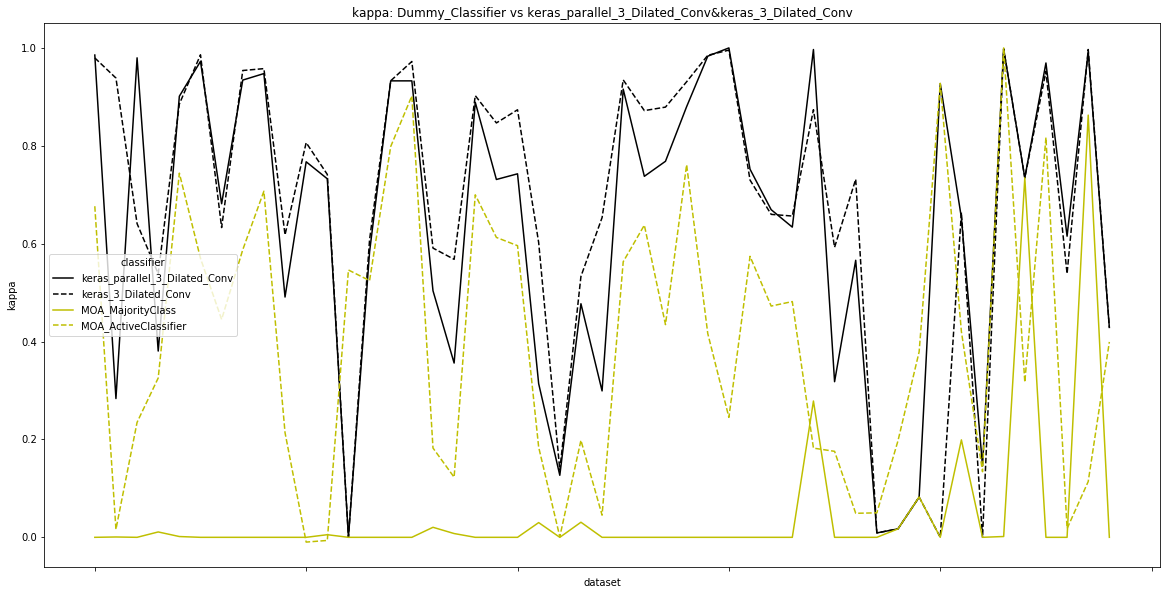

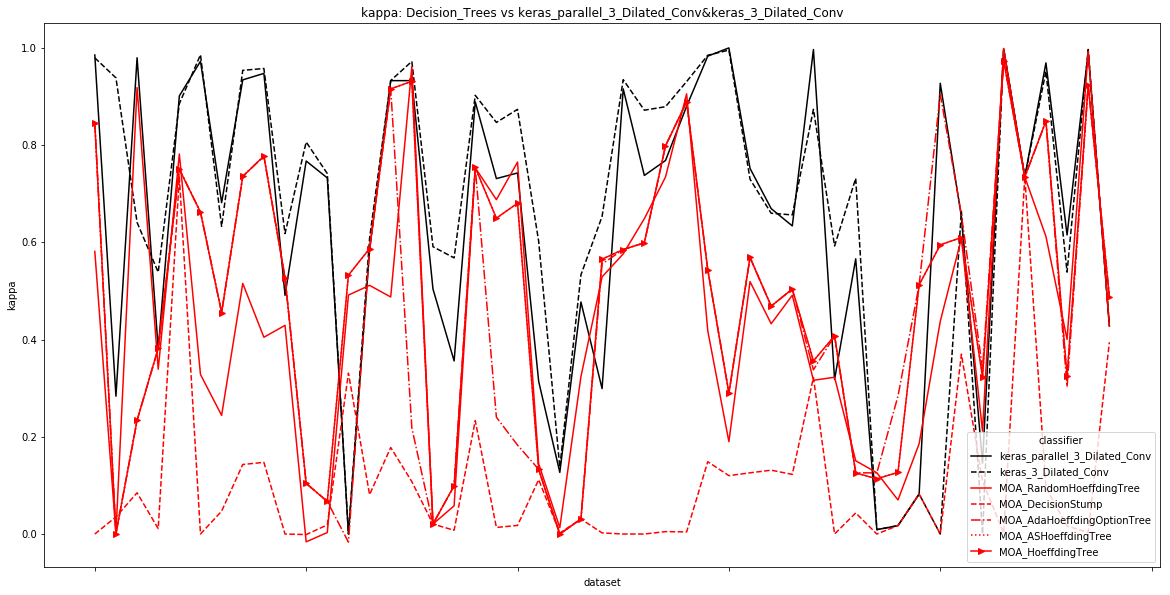

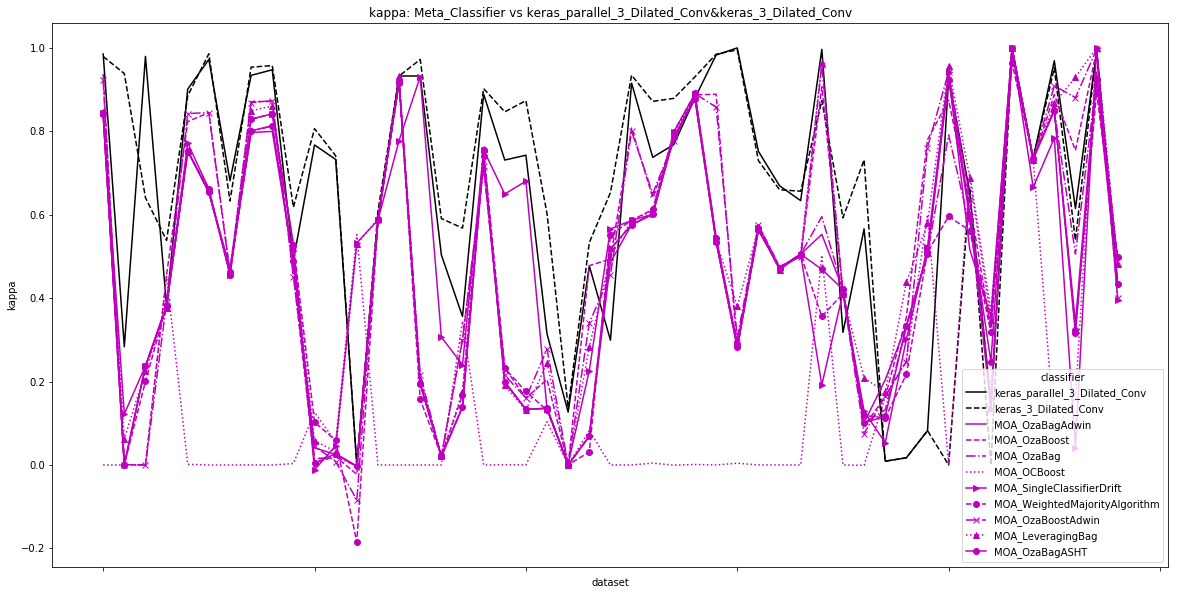

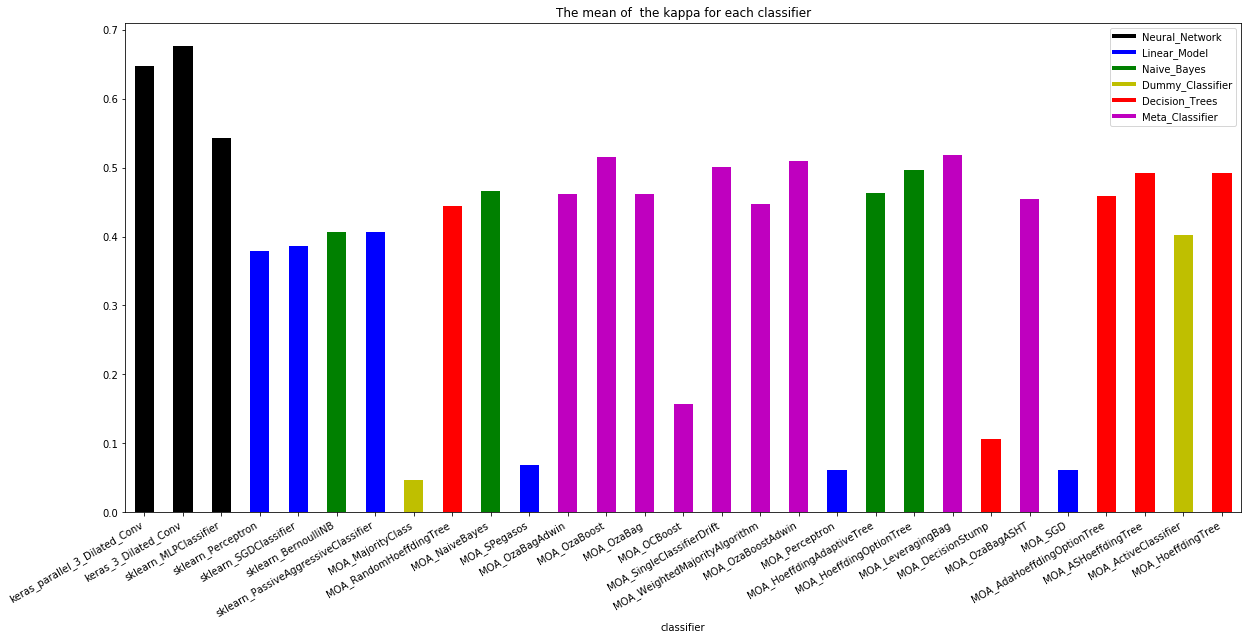

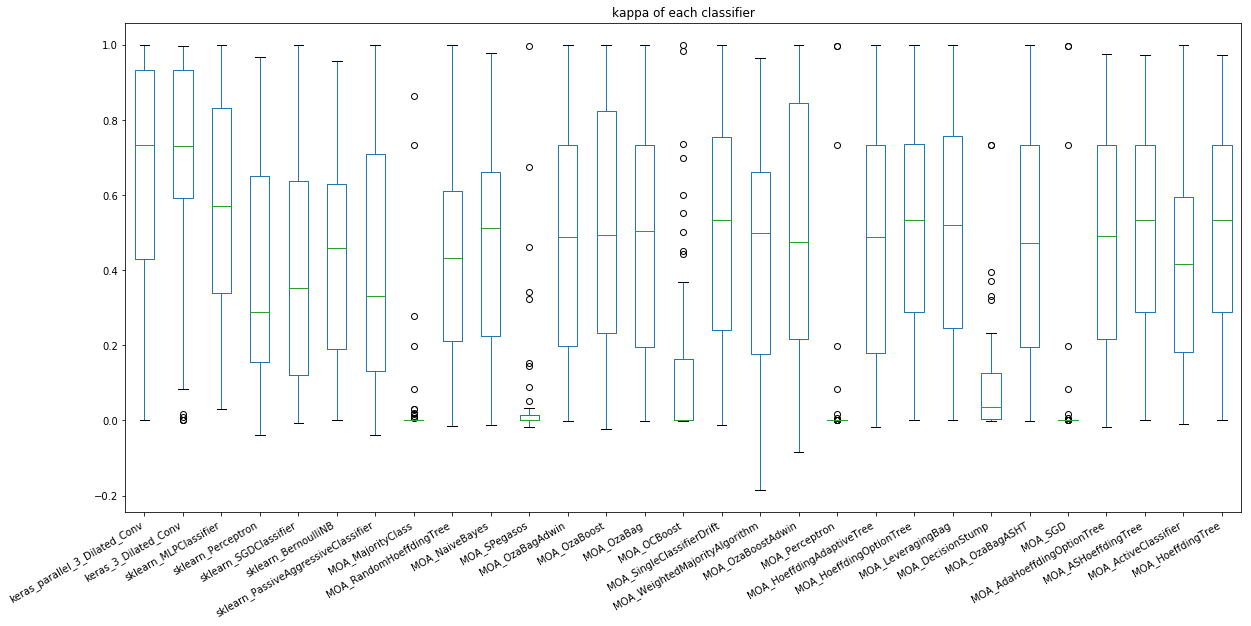

In [12]:
## Plot 
ax = metrics_table.plot(figsize=(20,10),   style=style, title= _METRIC+' for each dataset' )
ax.set_ylabel(_METRIC)
ax.get_figure().savefig(directory+'plot.png')
plt.show()

ax_log = metrics_table.plot(figsize=(20,10), logy=True,  style=style, title= _METRIC+' for each dataset (log scaled)' )
ax_log.set_ylabel(_METRIC+' (log)')
ax_log.get_figure().savefig(directory+'plot_log.png')
plt.show()

pdf_img_ls = [directory+'plot.png', directory+'plot_log.png' ]

for family in family_label.keys():
    classifiers_to_plot = [classifier for (classifier,f) in classifier_family.items() if f==family or classifier in classifier_to_compare]
    color_aux = [family_color[classifier_family[classifier]] for classifier in classifiers_to_plot]
    line_aux = [line_style[family_classifier[classifier_family[classifier]].index(classifier)] for classifier in classifiers_to_plot]
    style_aux = [c+s for c,s in list(zip(color_aux,line_aux))]
    metrics_table_aux = metrics_table[classifiers_to_plot]
    ax = metrics_table_aux.plot(figsize=(20,10), style=style_aux, title= _METRIC+': '+family_label[family]+' vs '+'&'.join(classifier_to_compare) )
    ax.set_ylabel(_METRIC)
    ax.get_figure().savefig(directory + 'plot_' + family +'.png')
    plt.show()
    pdf_img_ls.append(directory + 'plot_' + family +'.png')


## Bar plot (mean)
legend = [Line2D([0], [0], color=c, lw=4, label=family_label[f]) for f,c in family_color.items()]

ax = metrics_table.mean().plot.bar(figsize=(20,10), color=color, title= 'The mean of  the '+_METRIC+' for each classifier')
ax.legend(handles=legend)
ax.get_figure().autofmt_xdate()
ax.get_figure().savefig(directory+'mean.png')
plt.show()
pdf_img_ls = pdf_img_ls + [directory+'mean.png']
                           
#ax_log = metrics_table.mean().plot.bar(figsize=(20,10), color=color, logy=True, title= 'The mean of  the  '+_METRIC+' for each classifier (log scaled)')
#ax_log.legend(handles=legend)
#ax_log.get_figure().autofmt_xdate()
#ax_log.get_figure().savefig(directory+'mean_log.png')
#plt.show()
#pdf_img_ls = pdf_img_ls + [directory+'mean_log.png']

## Box Plot 
ax = metrics_table.plot.box(figsize=(20,10), title= _METRIC+' of each classifier')
ax.get_figure().autofmt_xdate()
ax.get_figure().savefig(directory+'box.png')
plt.show()
pdf_img_ls = pdf_img_ls + [directory+'box.png']
                           
#ax_log = metrics_table.plot.box(figsize=(20,10), logy=True, title= _METRIC+'  of each classifier (log scaled)')
#ax_log.get_figure().autofmt_xdate()
#ax_log.get_figure().savefig(directory+'box_log.png')
#plt.show()
#pdf_img_ls = pdf_img_ls + [directory+'box_log.png']

In [13]:
pdf_img_ls = [Image.open(i).convert('RGB') for i in pdf_img_ls]
pdf_filename = directory+_METRIC+'.pdf'
first = pdf_img_ls[0].copy()
first.save(pdf_filename,"PDF", resolution=100.0, save_all=True, append_images=pdf_img_ls[1:])
pdf_img_ls = []

### Results for each dataset

In [14]:
_NUM_CLASSIFIER = 10

metrics_top = metrics.copy()
metrics_top = metrics_top[metrics_top['classifier'] != 'keras_3_Dilated_Conv']
metrics_top = metrics_top.dropna()

means = metrics_top.groupby('classifier')[_METRIC].mean()
means = means[metrics_top['classifier']]
means.index = metrics_top.index
metrics_top['mean_'+_METRIC] = means
metrics_top = metrics_top.sort_values(by ='mean_'+_METRIC, ascending=False)

metrics_top = metrics_top[(metrics_top.classifier.isin(metrics_top['classifier'].unique()[:_NUM_CLASSIFIER]))]

metrics_top.head()

dataset                     classifier  instances  \
1879                        Symbols  keras_parallel_3_Dilated_Conv       1010   
2024                     TwoLeadECG  keras_parallel_3_Dilated_Conv       1152   
1328     NonInvasiveFetalECGThorax1  keras_parallel_3_Dilated_Conv       3755   
1560  ProximalPhalanxOutlineCorrect  keras_parallel_3_Dilated_Conv        881   
2517                   kddcup99norm  keras_parallel_3_Dilated_Conv     494010   

      attributes  classes  accuracy     kappa  train_time_mean  \
1879         398        6  0.907516  0.879860         0.027230   
2024          82        2  0.991893  0.983010         0.024715   
1328         750       42  0.754622  0.731105         0.043055   
1560          80        2  0.804164  0.477248         0.026979   
2517          41       23  0.997918  0.997893         0.209788   

      test_time_mean  total_time_mean    train_time   test_time    total_time  \
1879        0.020940         0.048170      2.750232    2.114940      2.750232   
2024        0.016947         0.041662      2.866913    1.965880      2.866913   
1328        0.018725         0.061779     16.188508    7.040582     16.188508   
1560        0.019431         0.046410      2.401170    1.729353      2.401170   
2517        0.007642         0.217430  10363.729111  377.521900  10363.729111   

      mean_kappa  
1879    0.647685  
2024    0.647685  
1328    0.647685  
1560    0.647685  
2517    0.647685

In [15]:
metrics_top.classifier.unique()

array(['keras_parallel_3_Dilated_Conv', 'sklearn_MLPClassifier',
       'MOA_LeveragingBag', 'MOA_OzaBoost', 'MOA_OzaBoostAdwin',
       'MOA_SingleClassifierDrift', 'MOA_HoeffdingOptionTree',
       'MOA_ASHoeffdingTree', 'MOA_HoeffdingTree', 'MOA_NaiveBayes'],
      dtype=object)

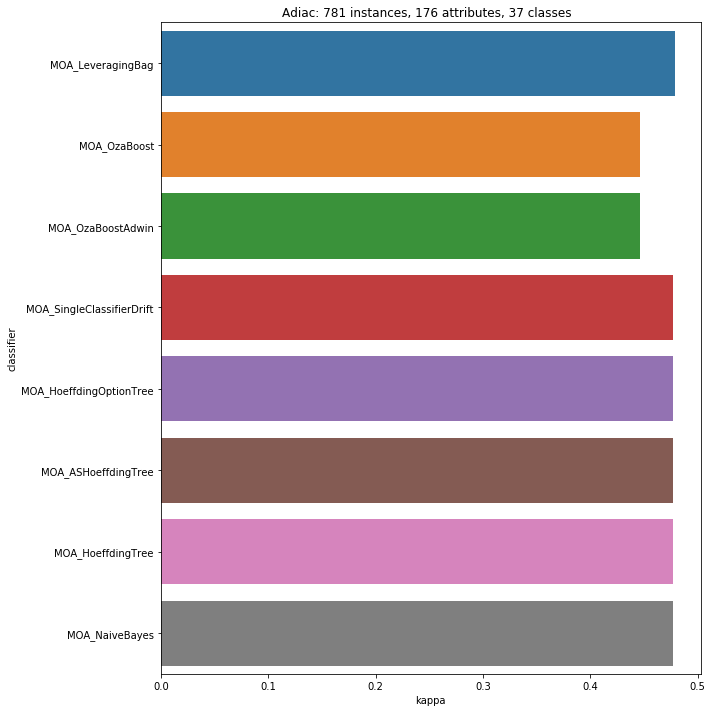

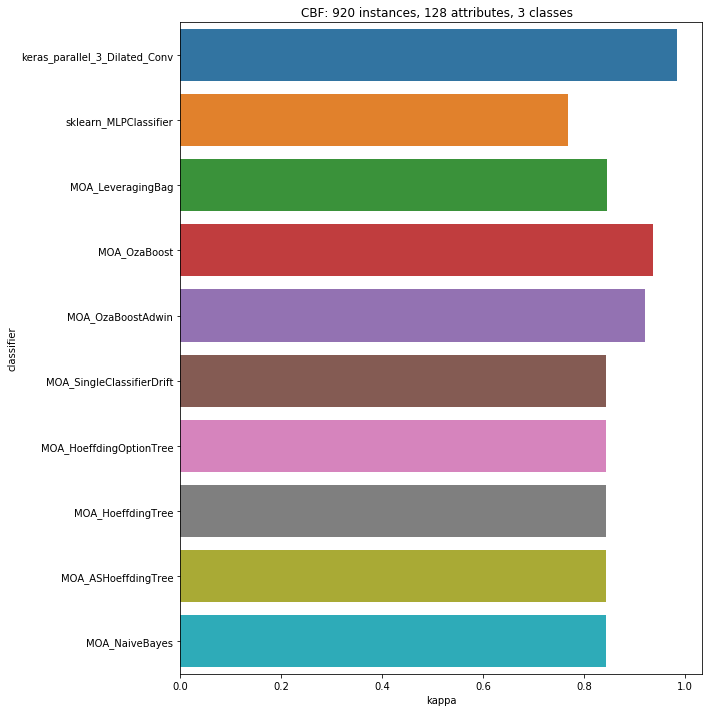

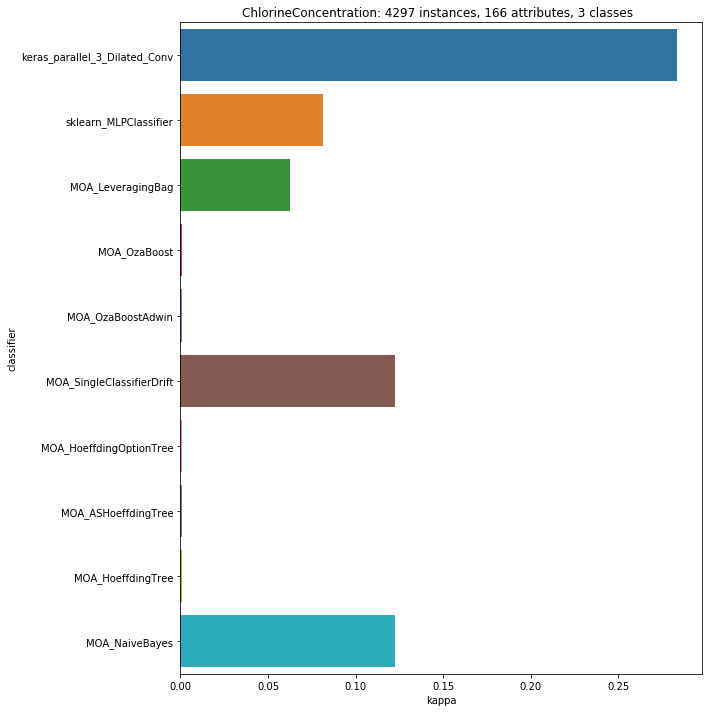

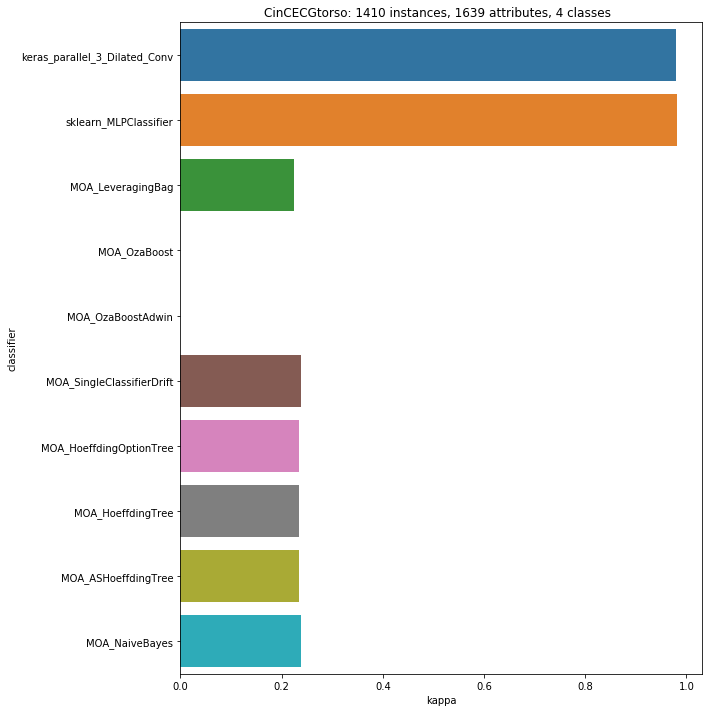

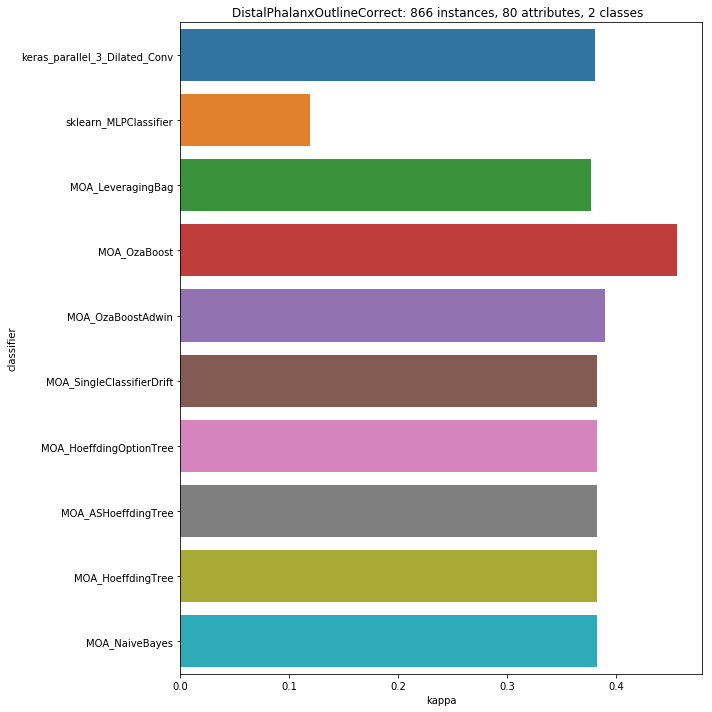

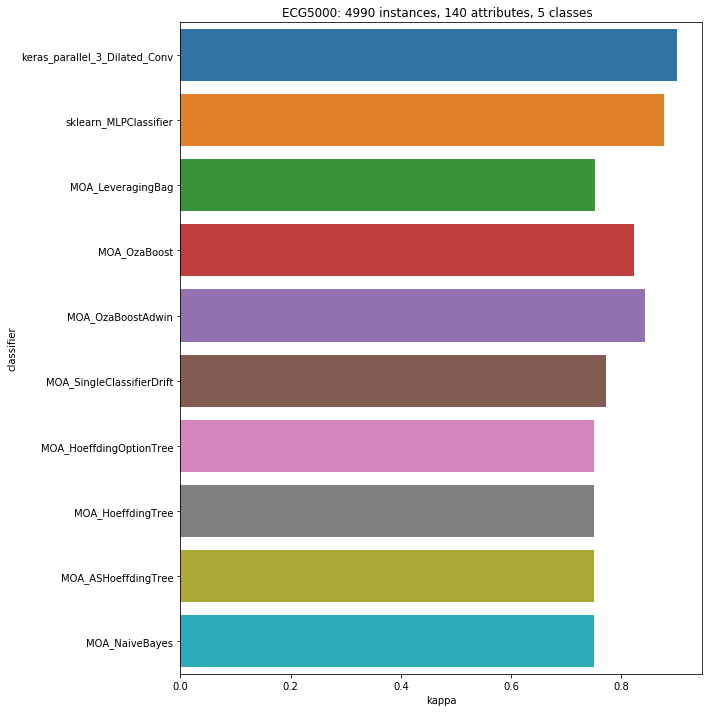

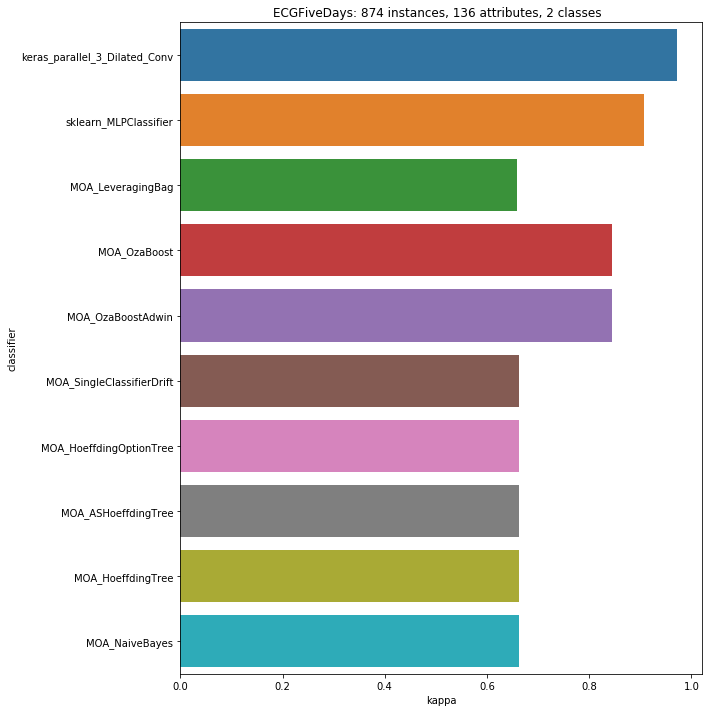

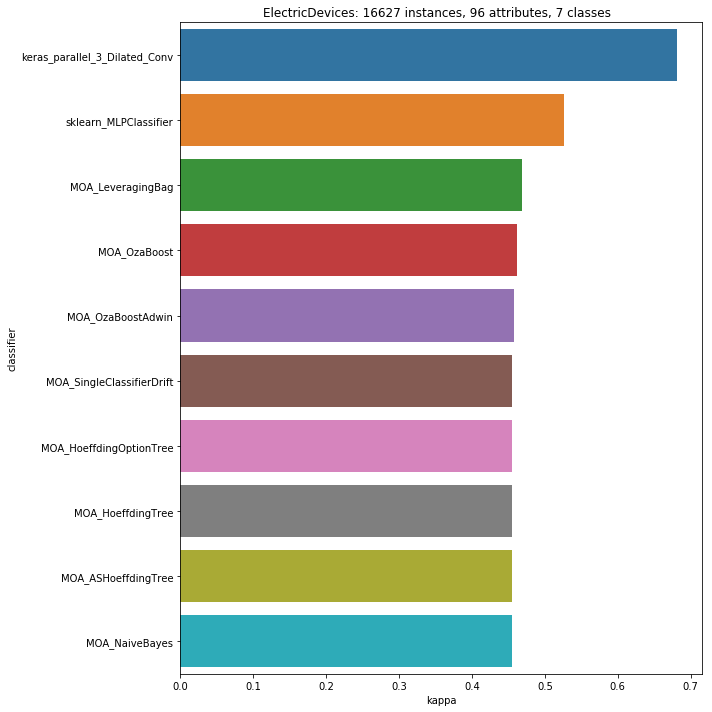

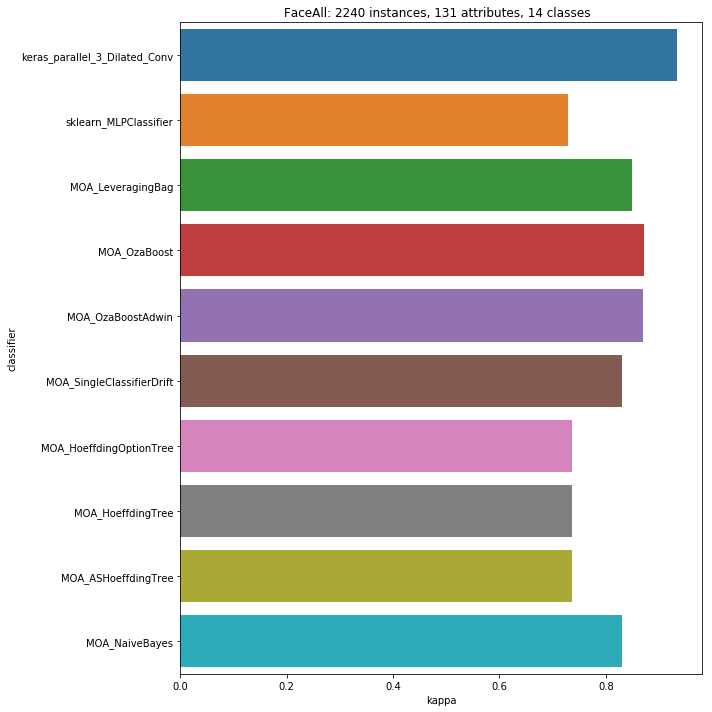

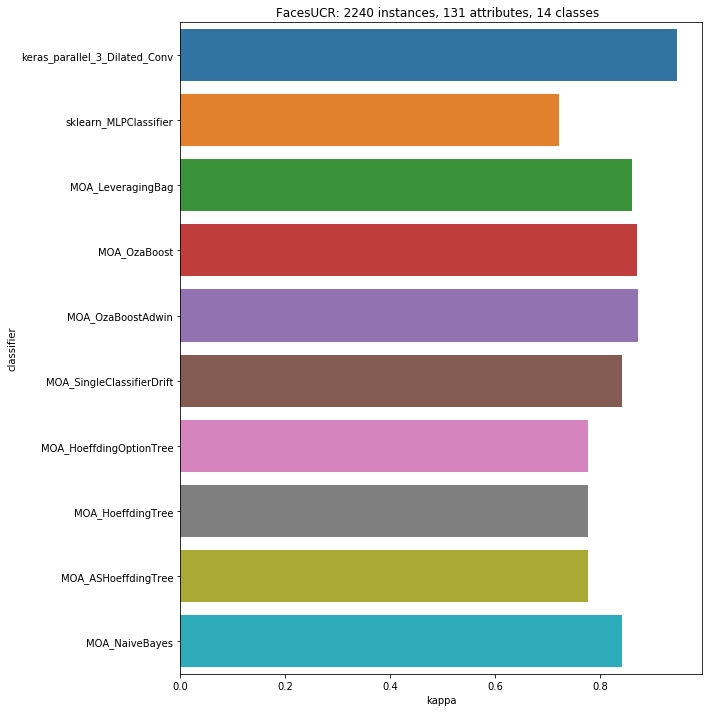

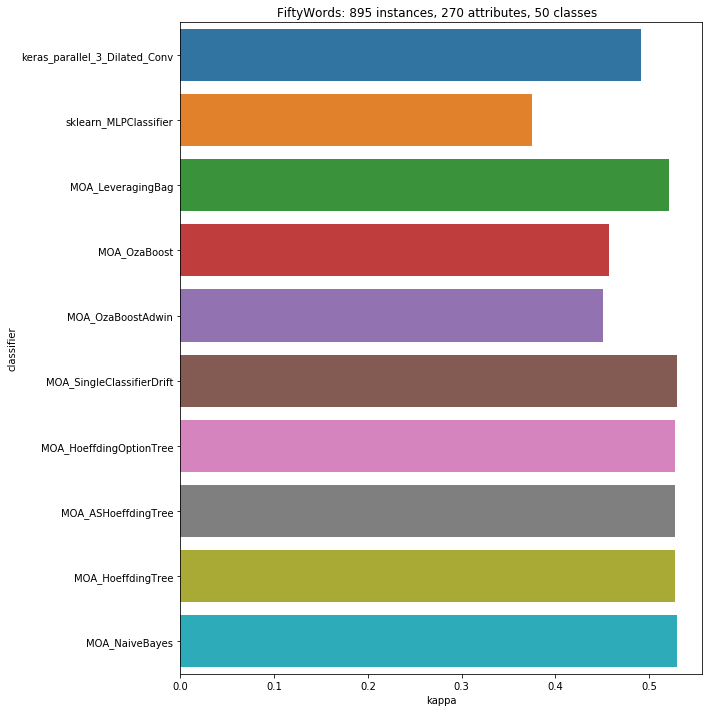

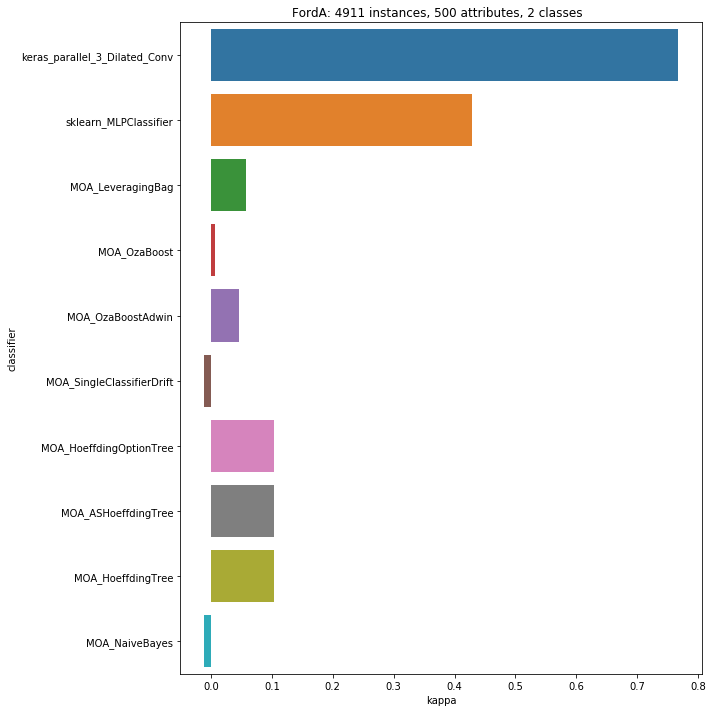

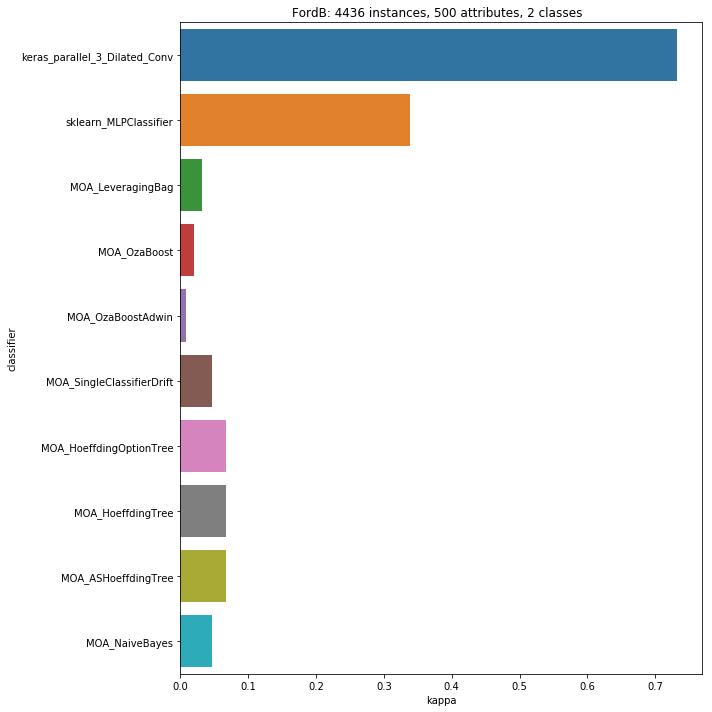

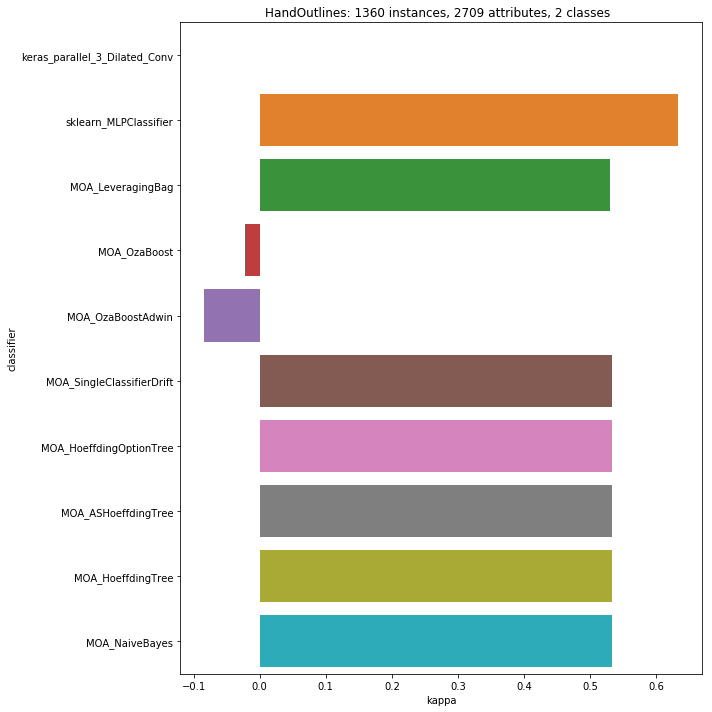

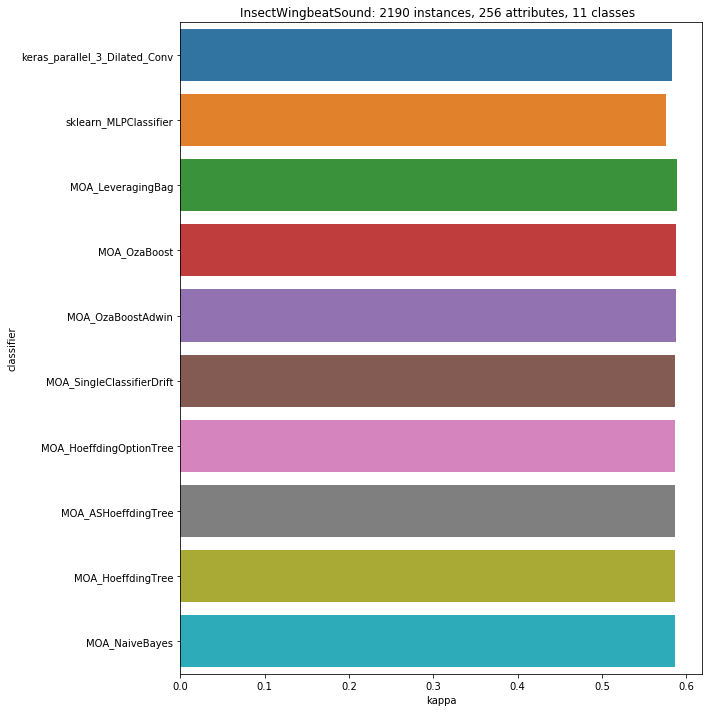

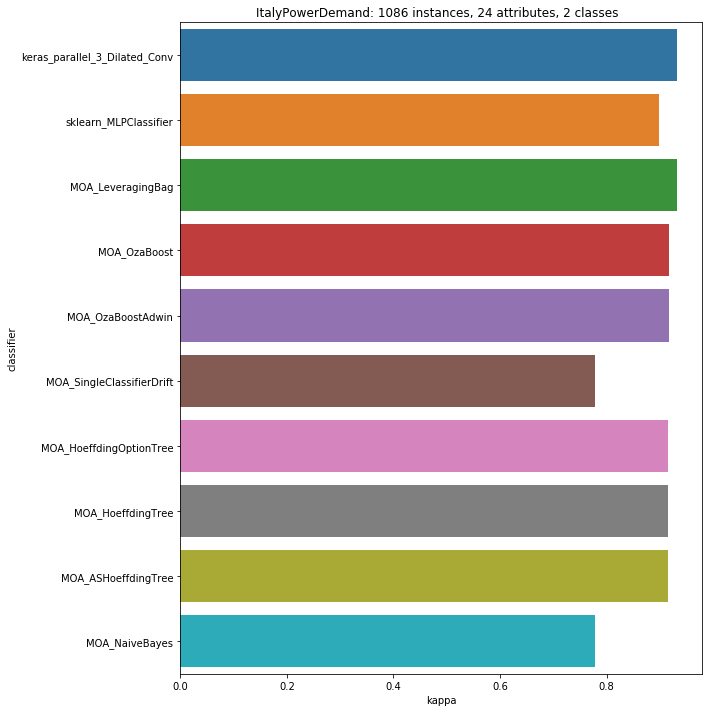

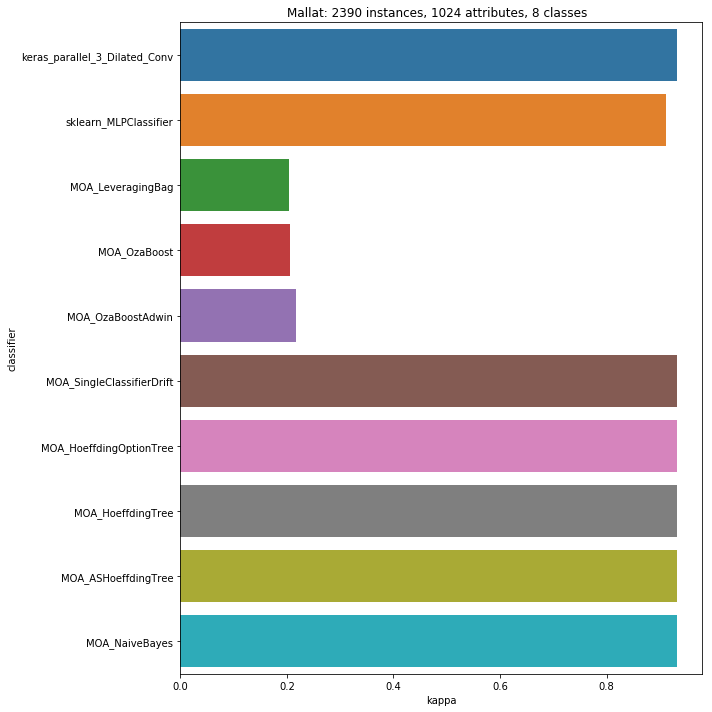

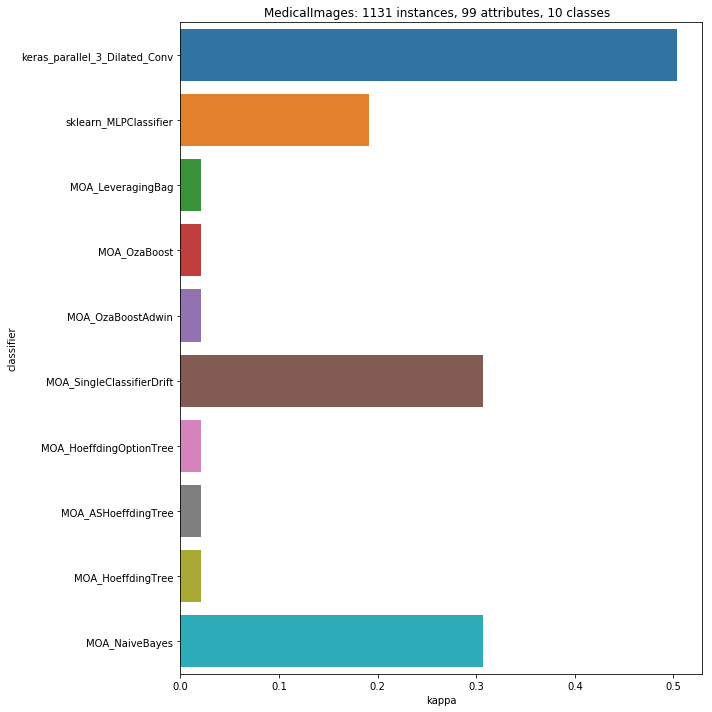

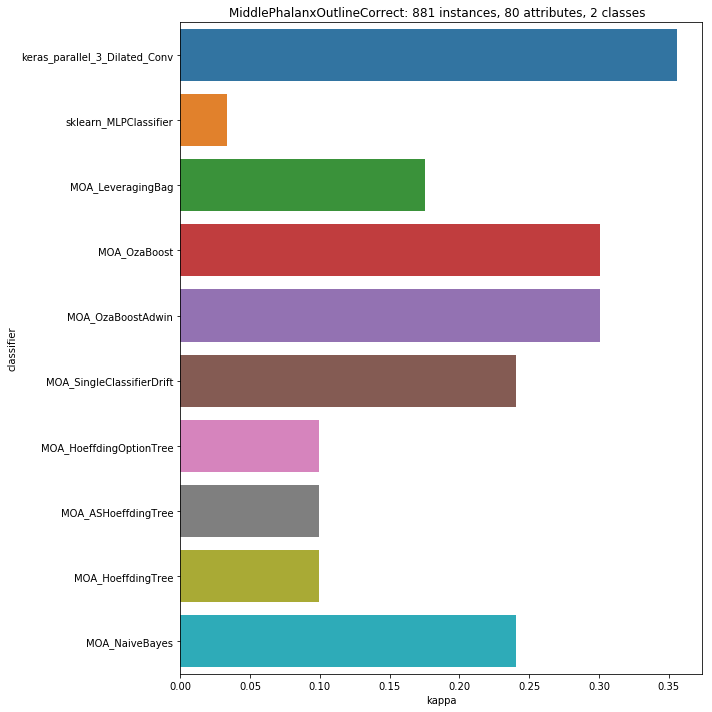

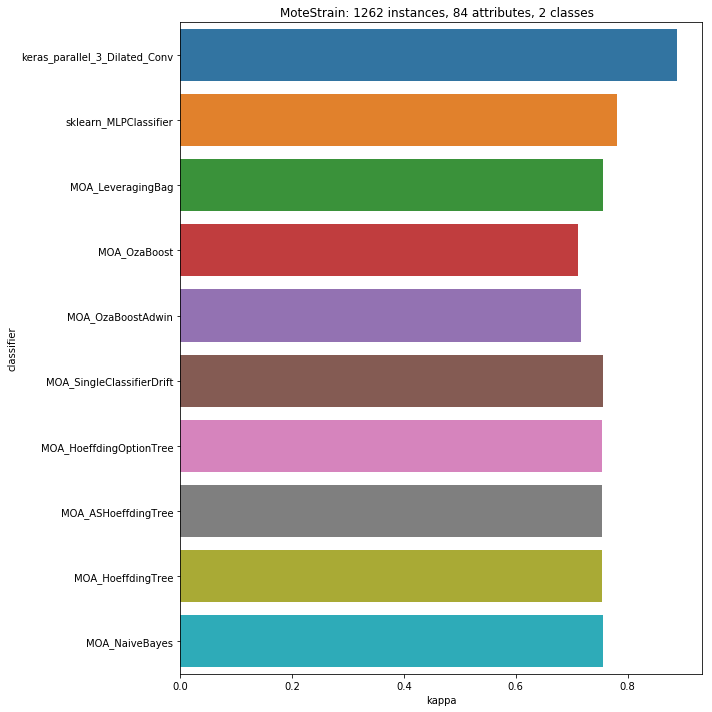

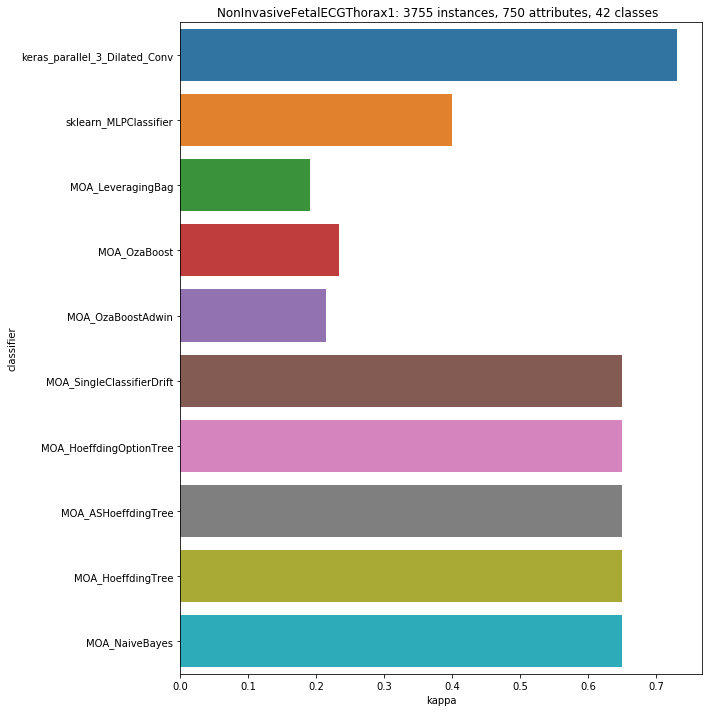

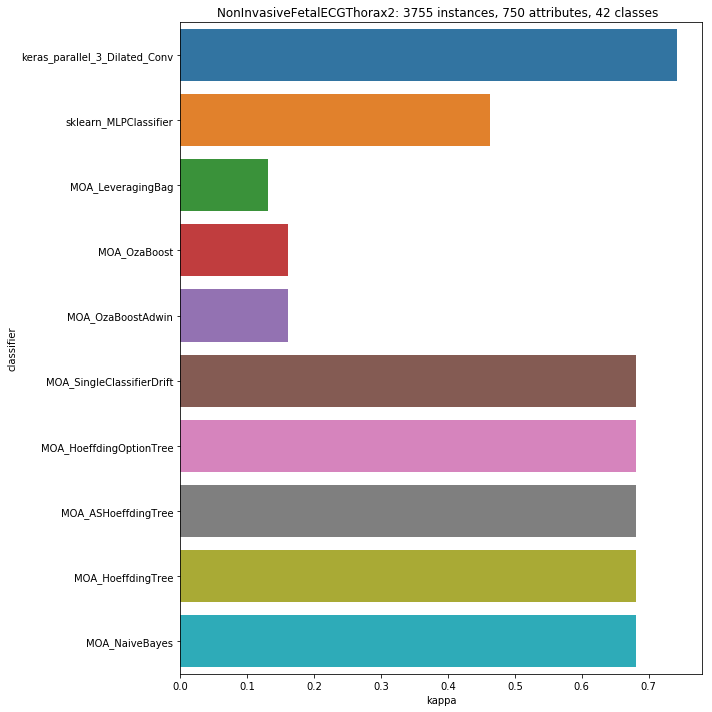

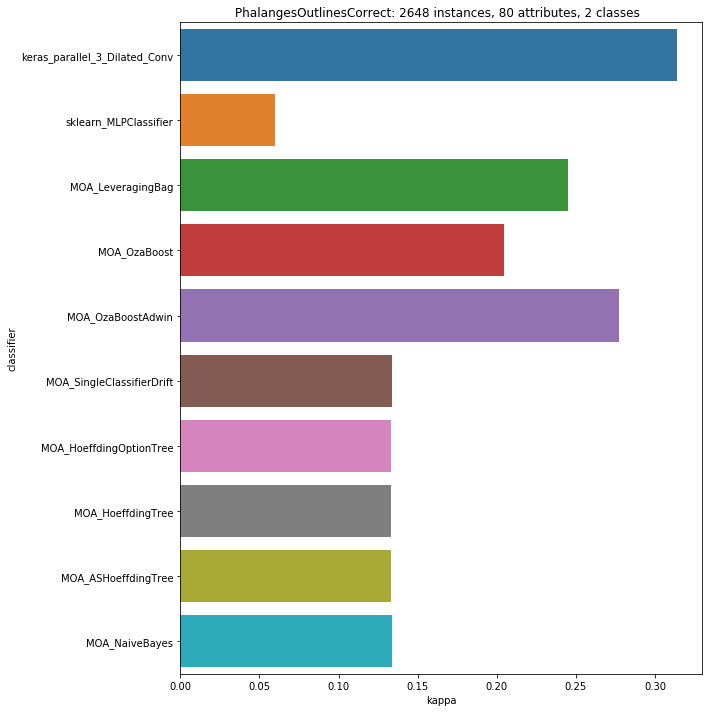

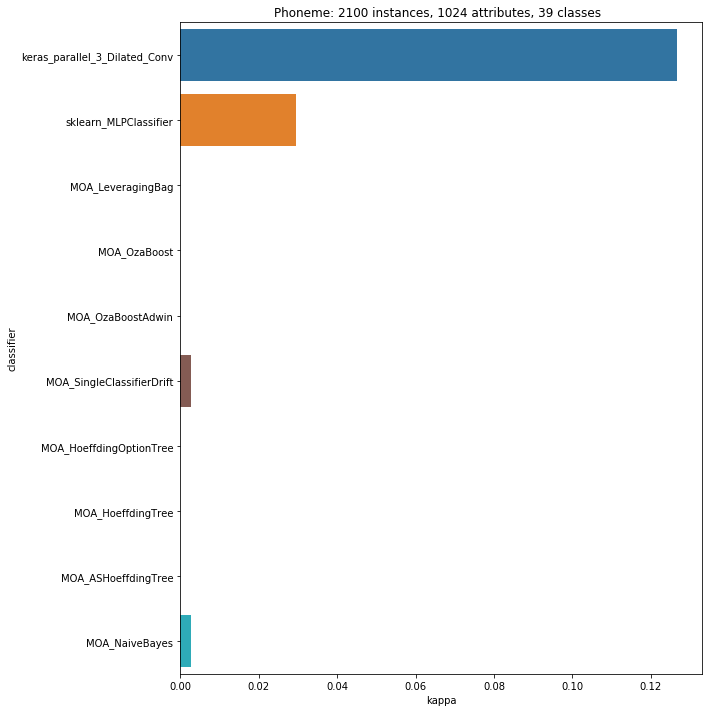

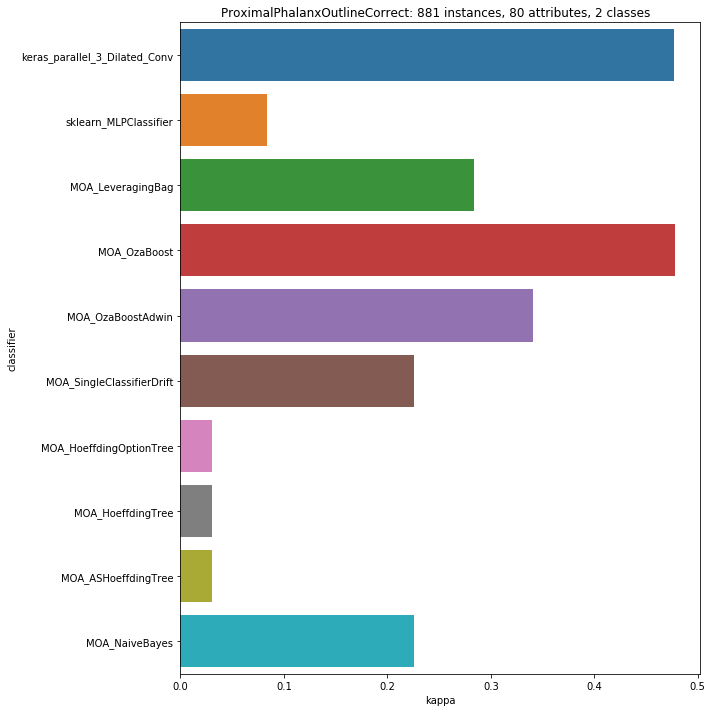

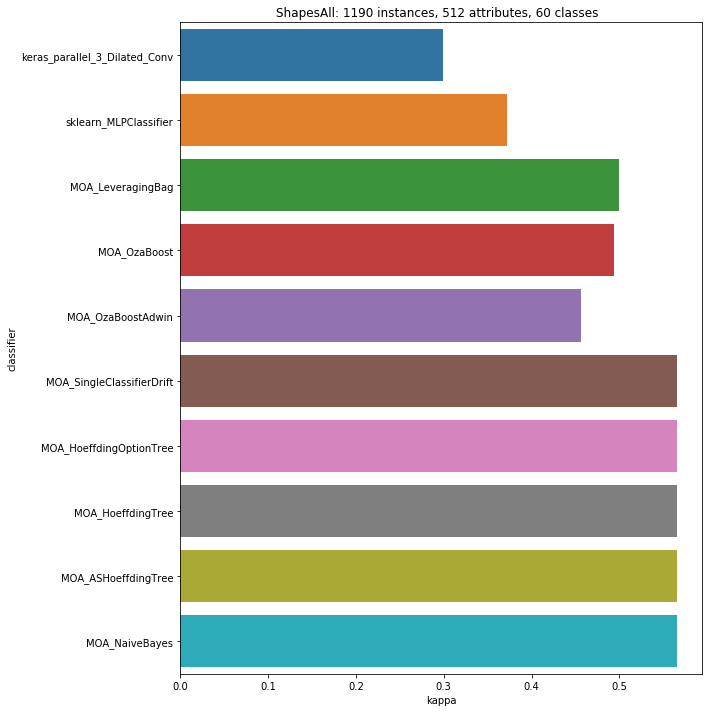

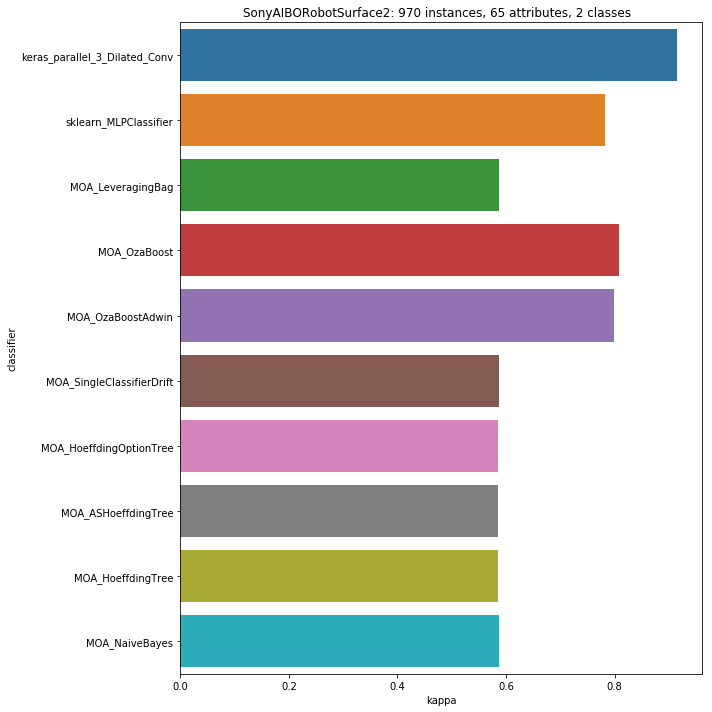

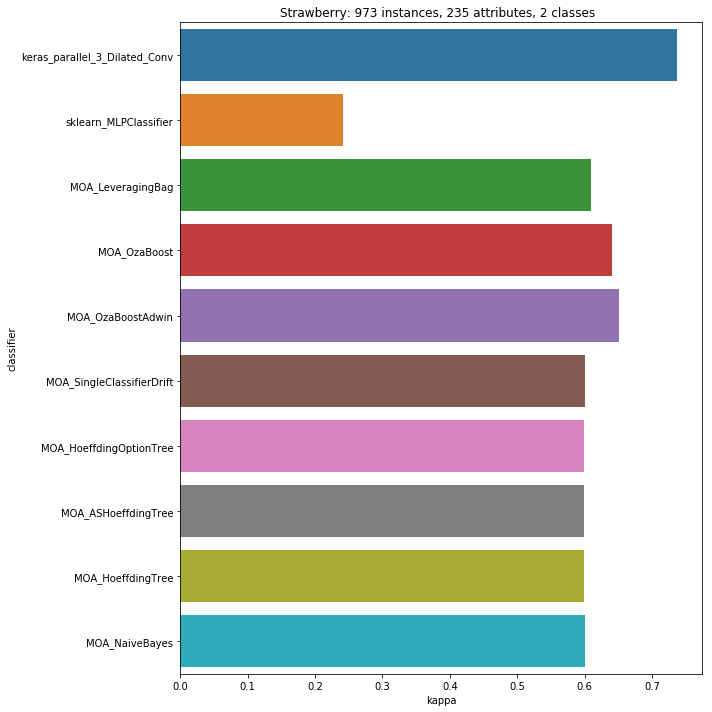

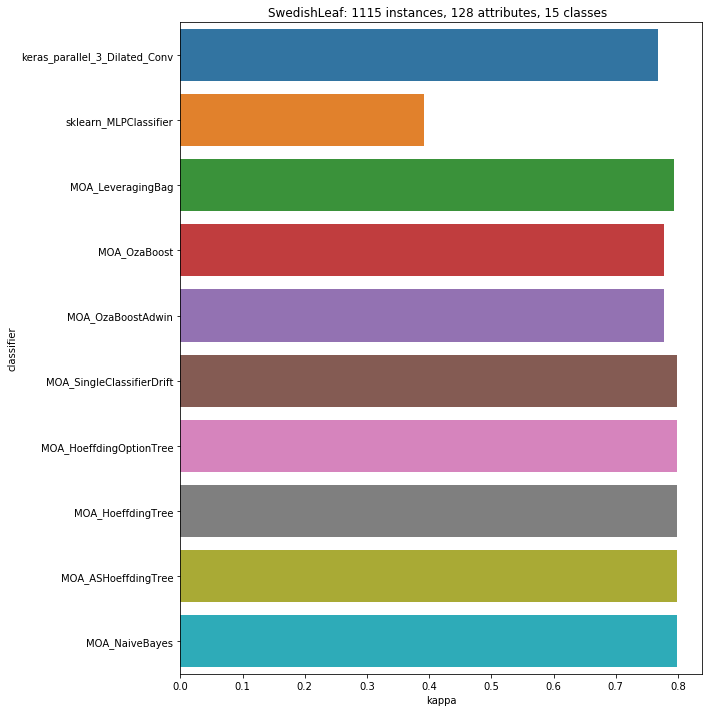

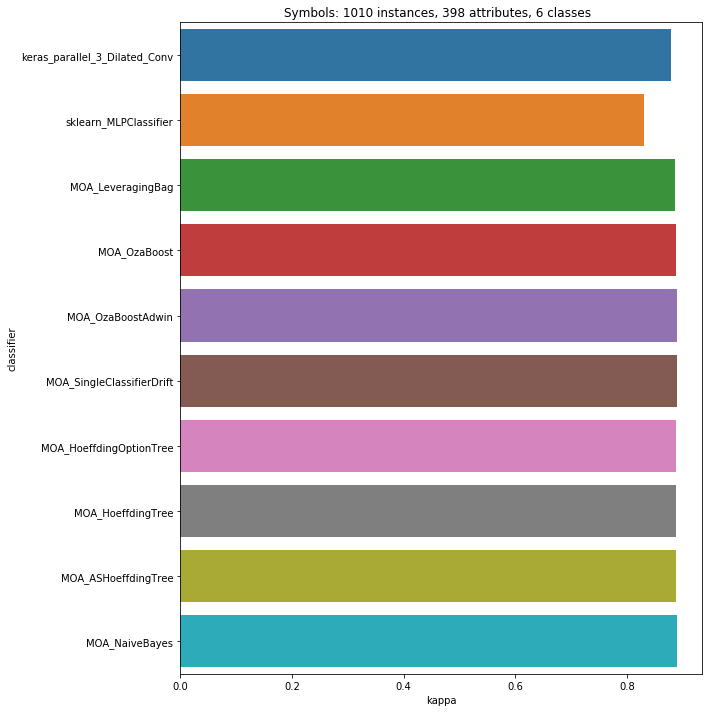

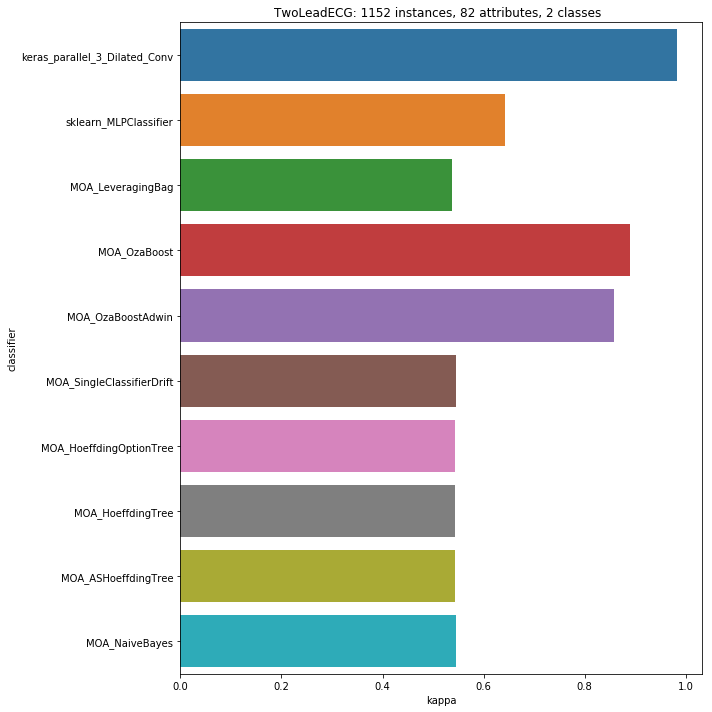

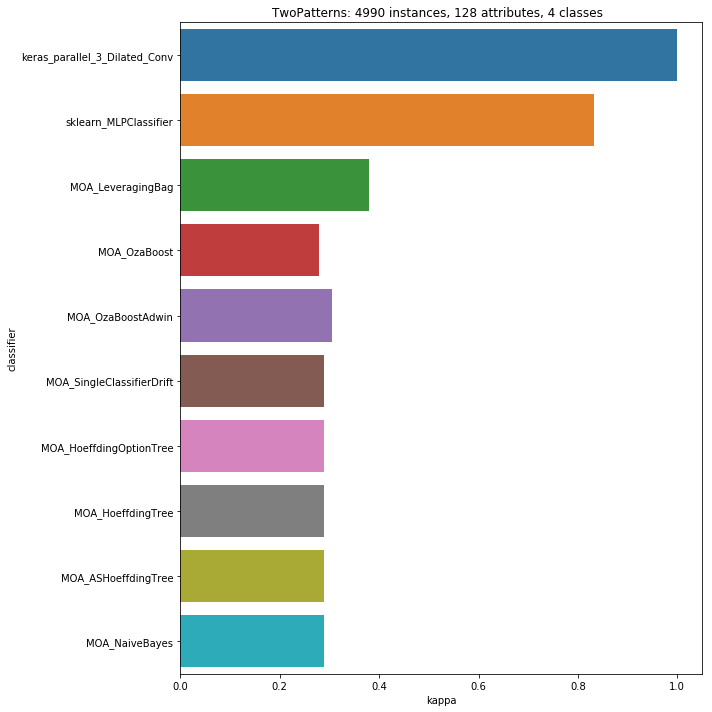

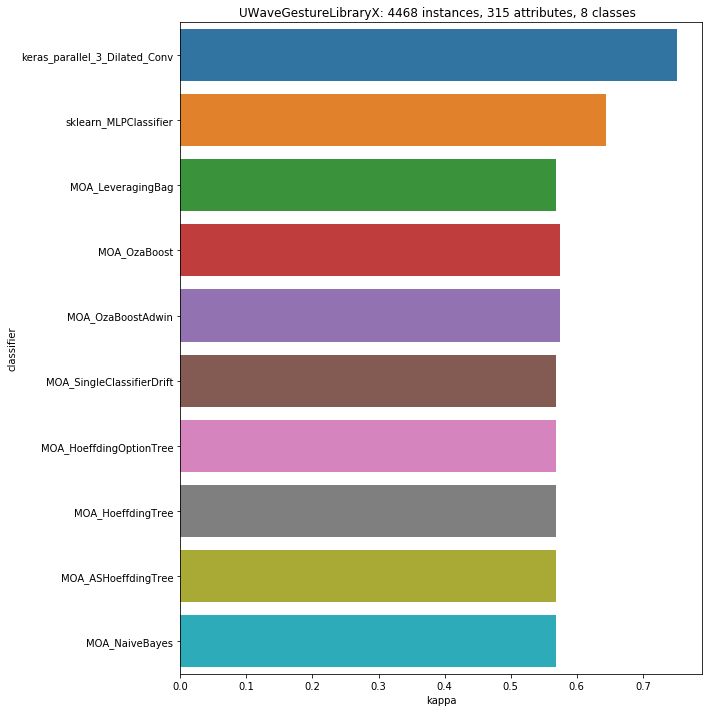

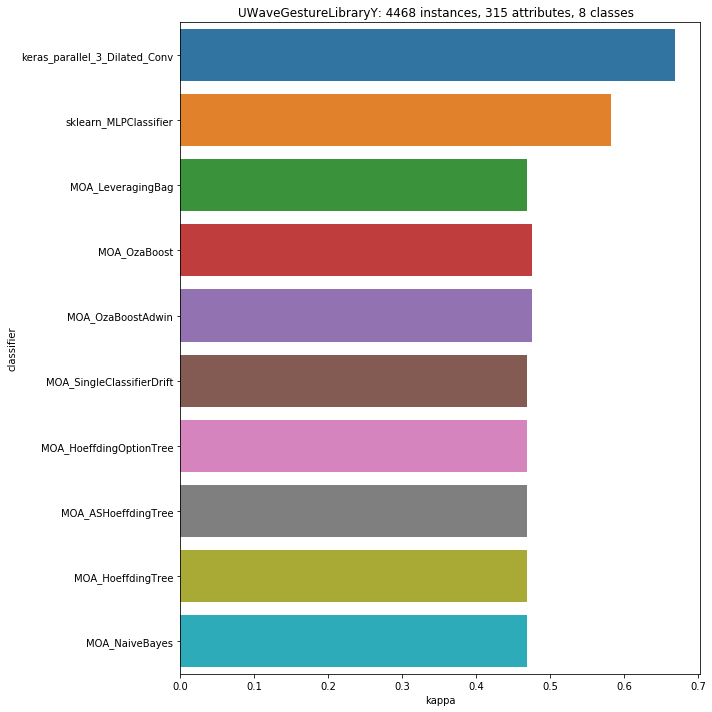

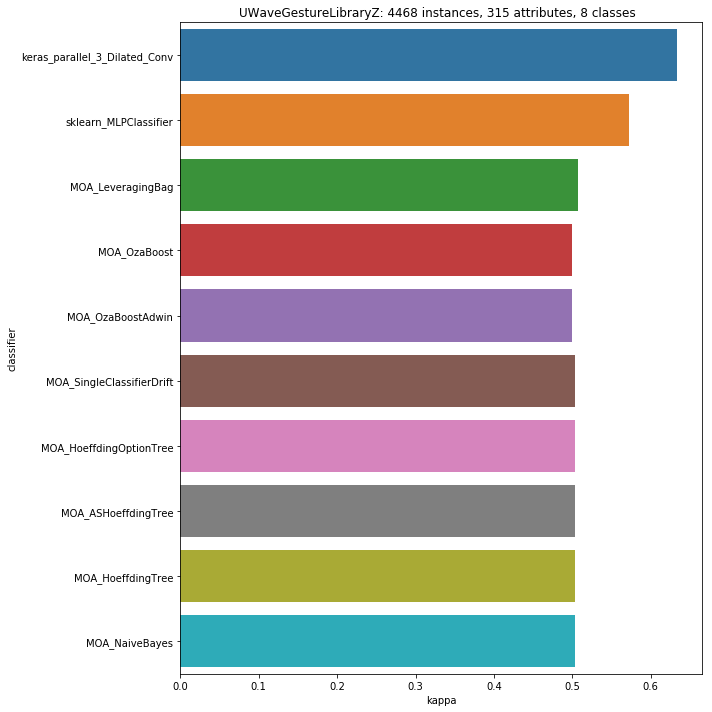

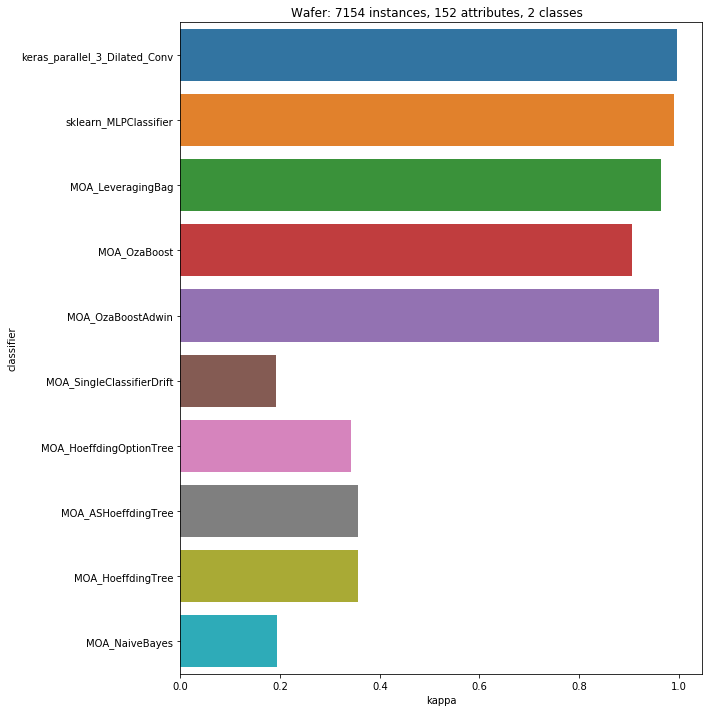

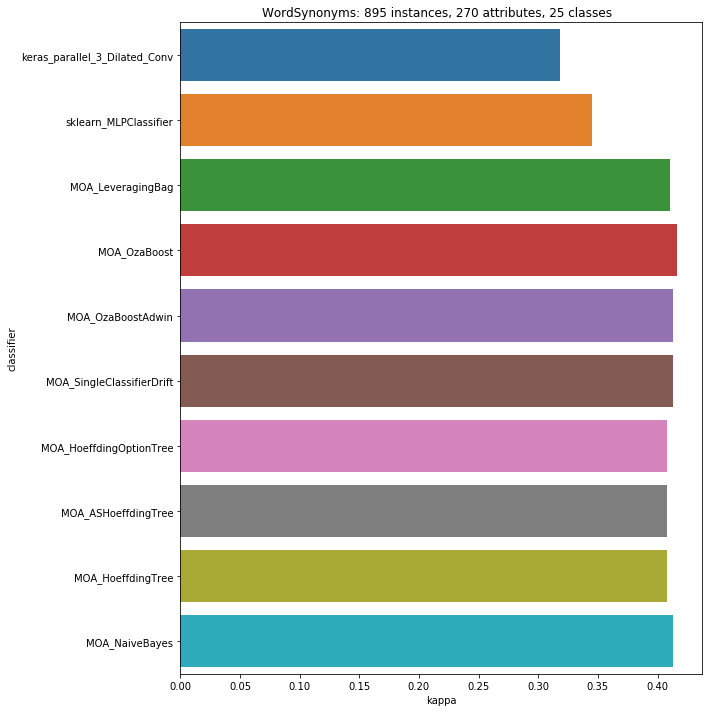

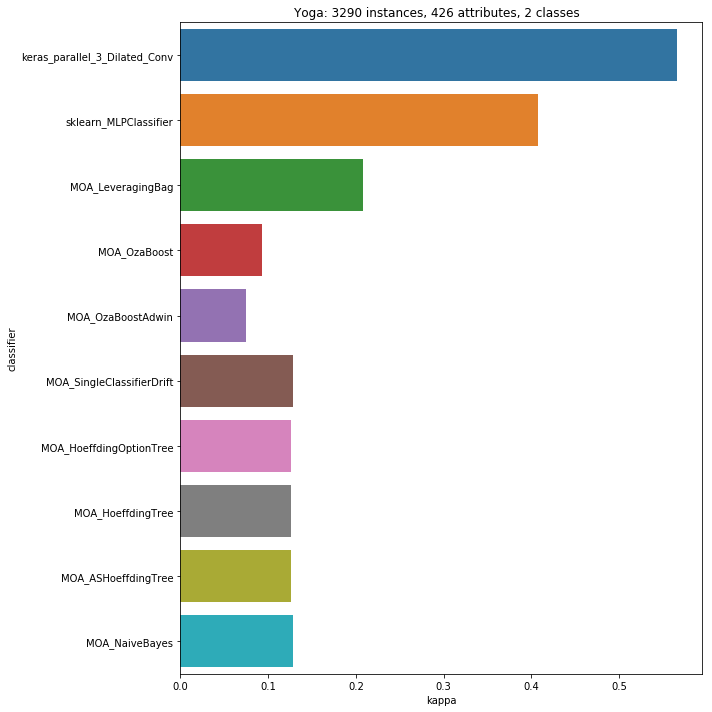

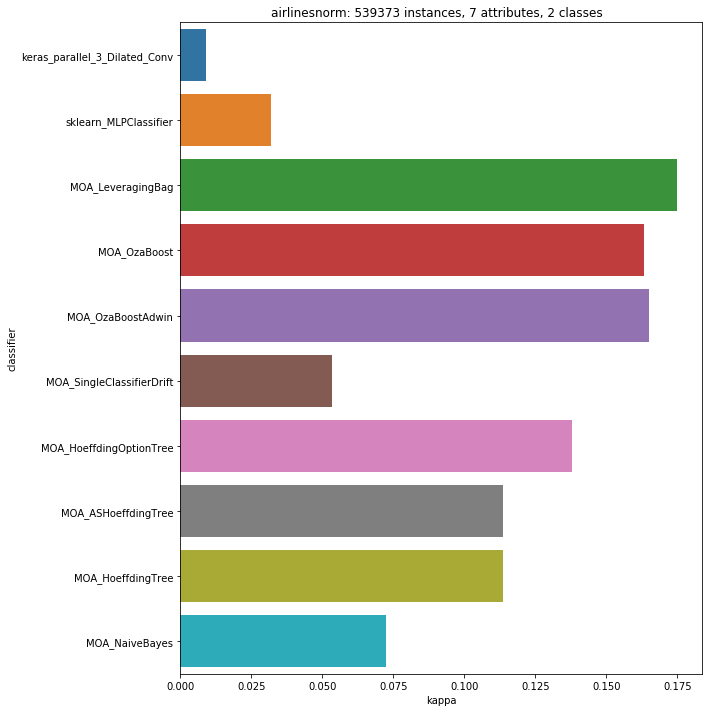

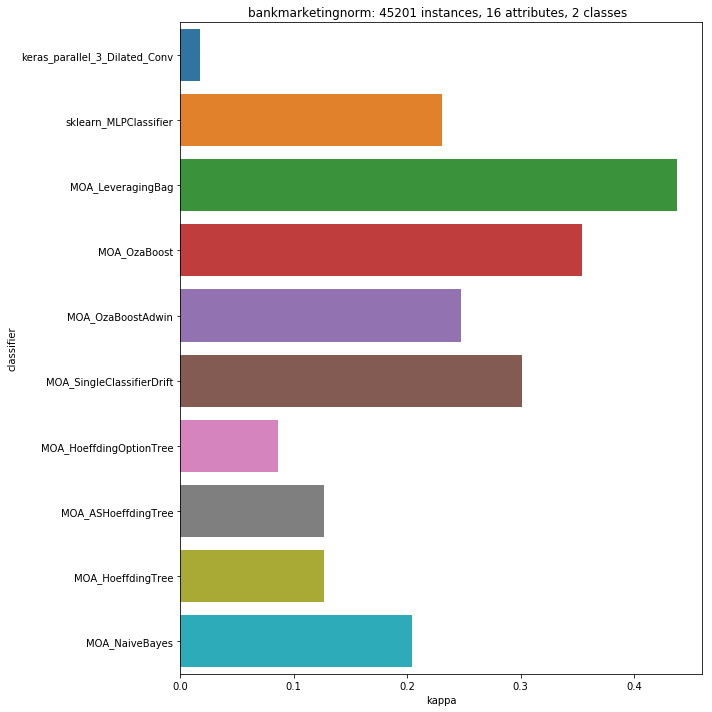

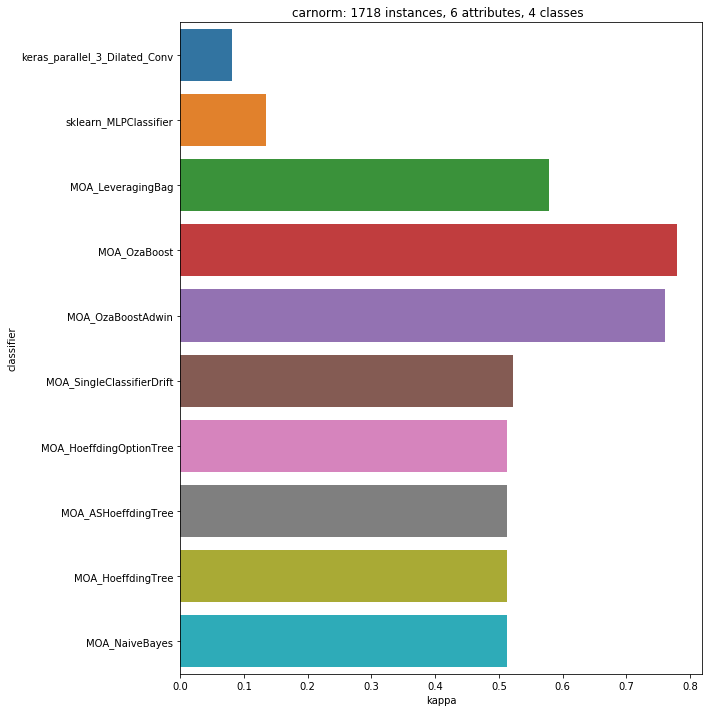

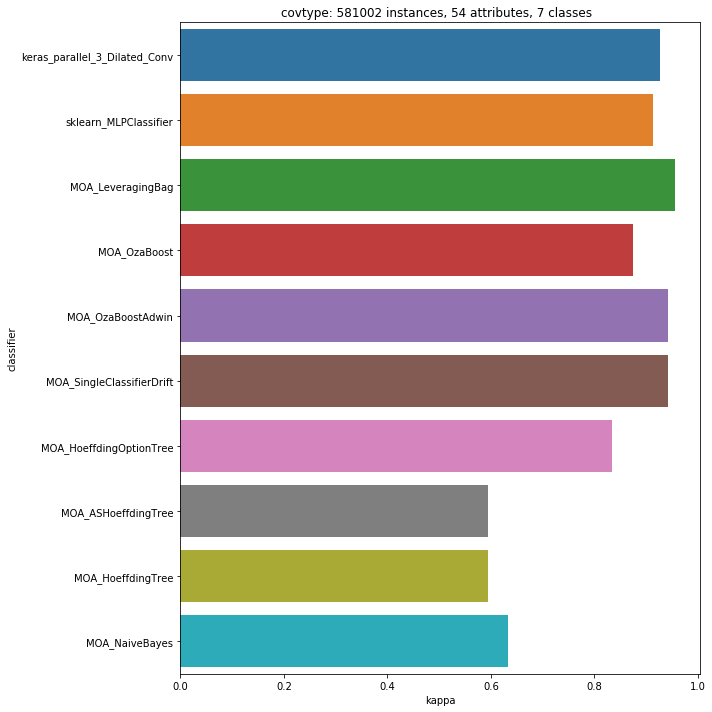

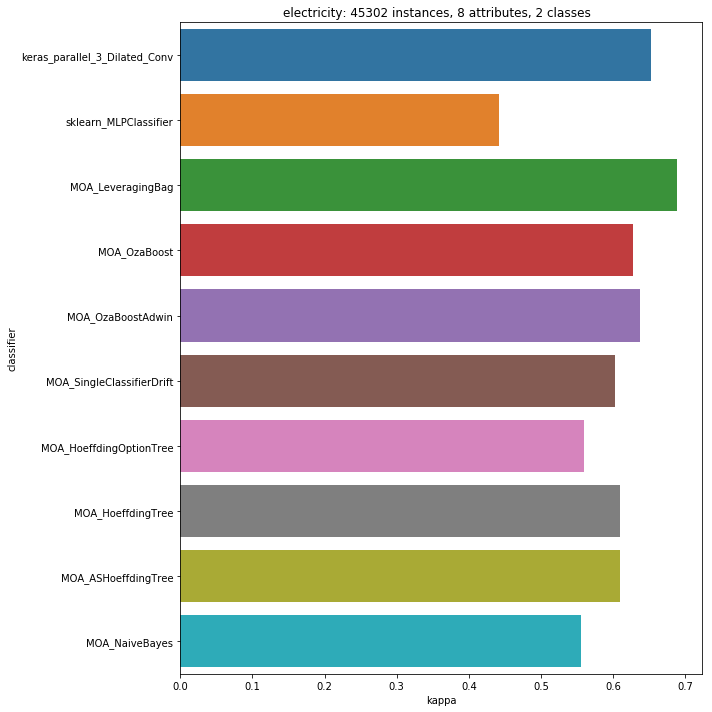

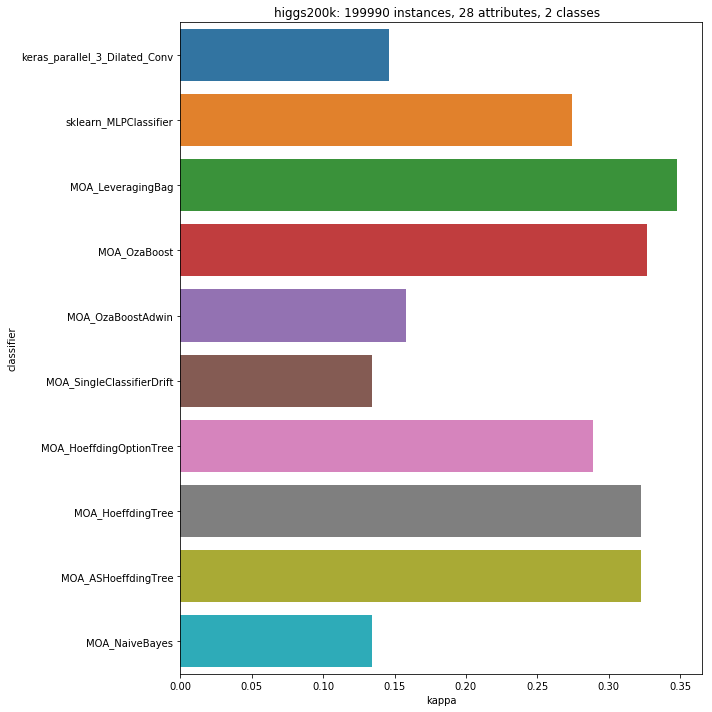

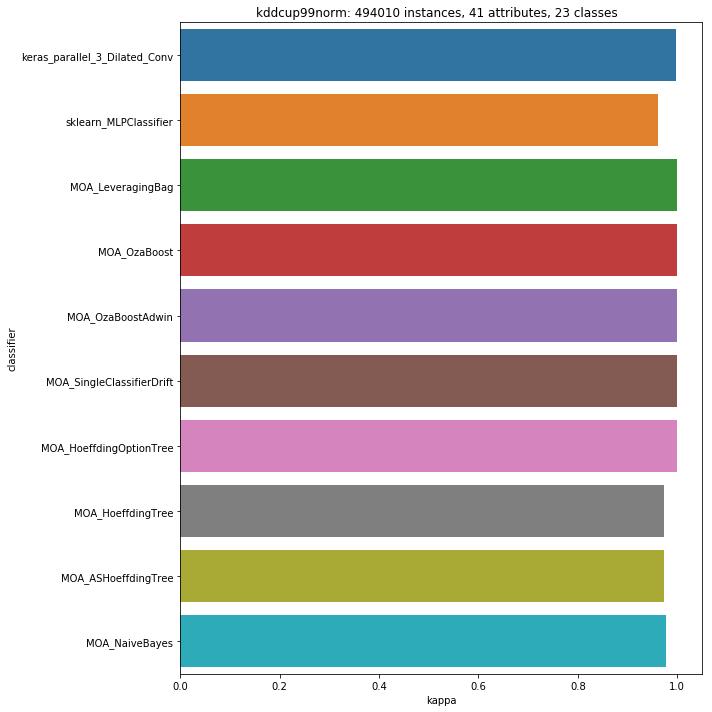

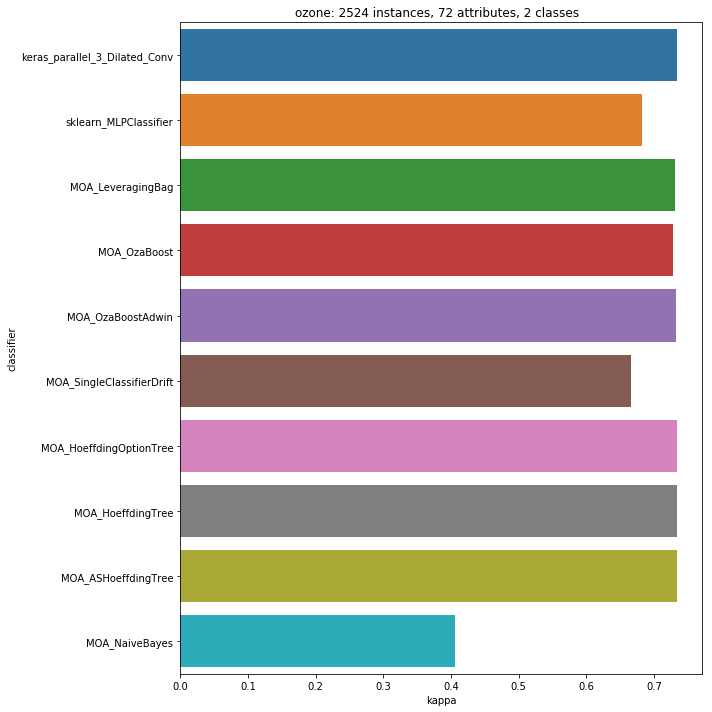

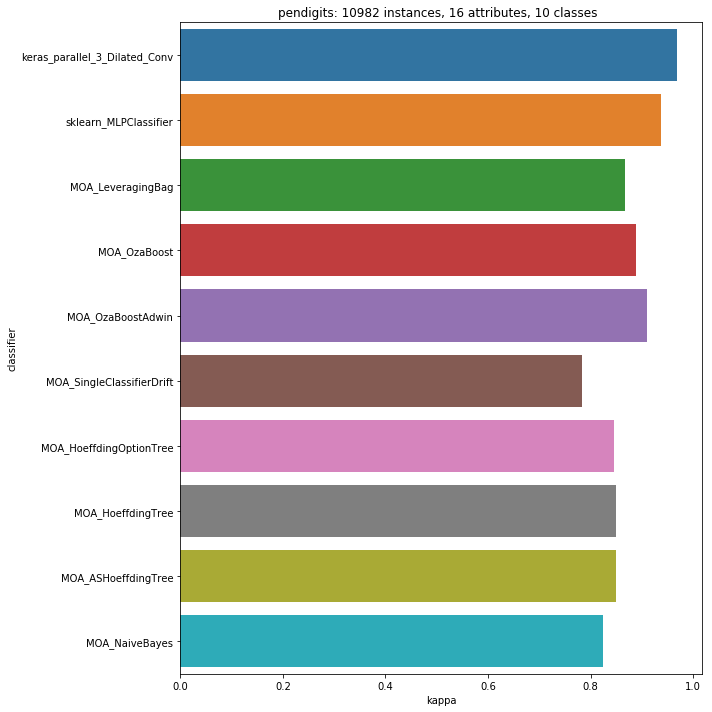

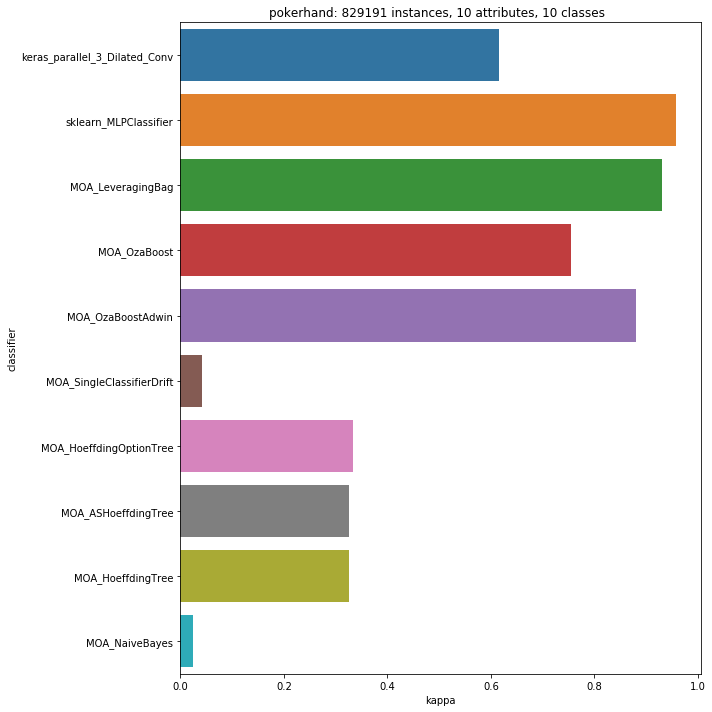

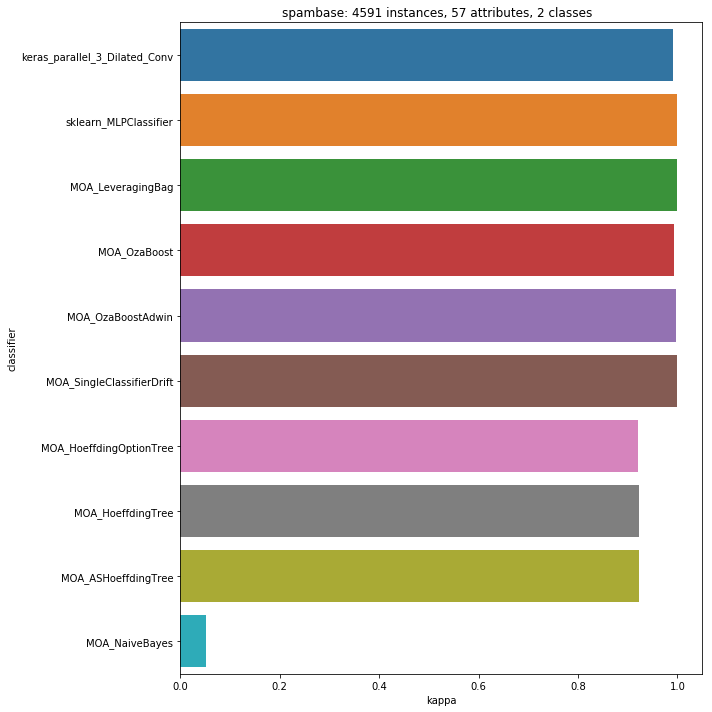

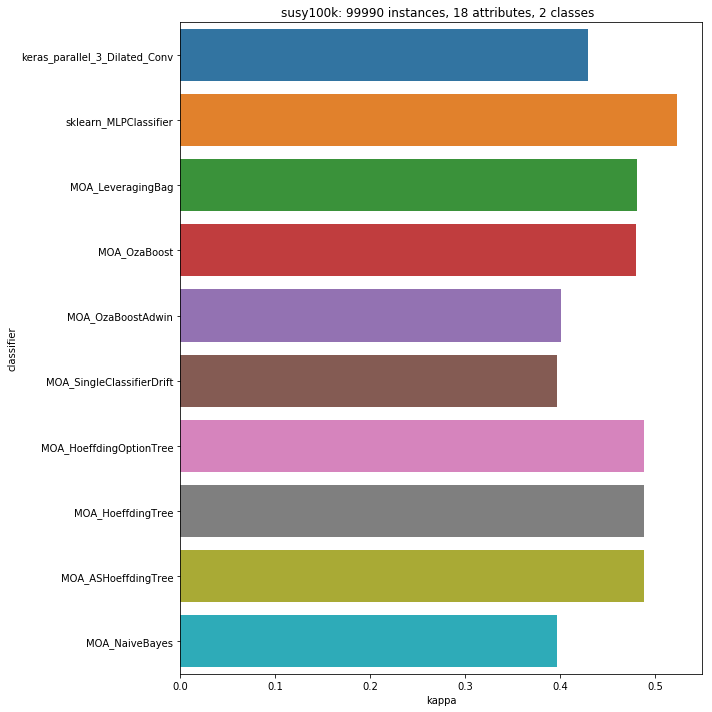

In [16]:
pdf_img_ls_top = []
for dataset in sorted(datasets):
    fig, ax = plt.subplots(1,figsize=(10,10))
    sns.barplot(ax=ax, data=metrics_top[['classifier', 'dataset', 'kappa']][metrics_top['dataset']==dataset], x='kappa', y='classifier', orient='h')
    inst = str(metrics_top[(metrics_top.dataset == dataset)].instances.values[0])
    attr = str(metrics_top[(metrics_top.dataset == dataset)].attributes.values[0])
    cl = str(metrics_top[(metrics_top.dataset == dataset)].classes.values[0])
    ax.set_title("{}: {} instances, {} attributes, {} classes  ".format(dataset, inst, attr, cl))
    fig.tight_layout()
    ax.get_figure().savefig(directory+dataset+'-top.png')
    pdf_img_ls_top.append(directory+dataset+'-top.png')
    plt.show()

In [17]:
pdf_img_ls = [Image.open(i).convert('RGB') for i in pdf_img_ls_top]
pdf_filename = directory+"datasets-top_classifier-"+_METRIC+'.pdf'
first = pdf_img_ls[0].copy()
first.save(pdf_filename,"PDF", resolution=100.0, save_all=True, append_images=pdf_img_ls[1:])
pdf_img_ls = []

## Save plots as pdf

In [18]:
pdf_img_ls = [Image.open(i).convert('RGB') for i in pdf_img_ls]
pdf_filename = directory+_METRIC+'_prop.pdf'
first = pdf_img_ls[0].copy()
first.save(pdf_filename,"PDF", resolution=100.0, save_all=True, append_images=pdf_img_ls[1:])
pdf_img_ls = []

IndexError: list index out of range